# E-Commerce Customer Churn Analysis & Prediction

**Created by**: Abdillah Zaraaifa, Abdul Hadi, Anas Putra Aghazy

## **Introduction**

Bradlees, an American-based e-commerce platform, facilitates seamless transactions between buyers and sellers, generating revenue from every customer transaction. While the platform has enjoyed substantial growth in its customer base over recent years, recent trends reveal a concerning rise in customer attrition.

To sustain profit growth, Bradlees can either retain existing customers or acquire new ones. However, research consistently shows that acquiring new customers is 4 to 5 times more expensive than retaining current ones, making customer retention a more cost-effective strategy.

This highlights the importance of Machine Learning (ML) in churn prediction. ML models can uncover patterns within large datasets, such as transaction history, interaction behaviors, and demographic details, to identify customers at risk of leaving. Before building predictive models, EDA serves as a critical step to understand the data, detect anomalies, identify patterns, and inform feature engineering decisions that enhance model performance.


**Cost Analysis Snapshot:**

- Retention Cost: Bradlees spends USD 20.000 annually to retain 1.000 existing customers, resulting in a retention cost of USD 20 per customer.

- Acquisition Cost: The company spends USD 40.000 per year to acquire 1.000 new customers, leading to an acquisition cost of USD 40 per customer.

**Breakdown of Customer Retention Costs:**

- Promotions and Discounts: Special offers to enhance customer loyalty.

- Cashback & Loyalty Programs: Providing cashback and rewards to retain loyal customers.

- Personalized Marketing: Sending behavior-based communications and offers.

- Customer Service & Account Management: Staffing costs for customer service, customer success, and account managers to improve customer experience.

- Retention Marketing: Investments in marketing strategies focused on customer retention.

## **Problem Statement**

One of the main challenges faced by e-commerce businesses is keeping customers engaged and encouraging repeat transactions. Bradlees has experienced a decline in customer growth due to rising churn, leading to stagnating or even decreasing profits. To address this issue, the company must focus on customer retention and preventing churn, as it has a direct impact on long-term profitability and growth.

However, it is important to note that this section is focused solely on Exploratory Data Analysis (EDA). The purpose of this analysis is to understand the characteristics of the data, identify initial patterns or trends, and uncover potential factors contributing to churn. EDA serves as a critical foundation before proceeding to modeling or making data-driven strategic decisions.

## **Goals**

This project was initiated to help Bradlees develop a data-driven customer retention strategy. By analyzing historical customer behavior, the project aims to:

- Provide insights that will serve as the foundation (EDA) for developing a machine learning model to predict customer churn;
- Support strategic decisions focused on improving customer retention;
- Identify high-risk churn customers;
- Minimize revenue loss and improve marketing effectiveness;
- Provide actionable insights to enhance long-term profitability.

Through this approach, Bradlees can shift from reactive to proactive engagement, strengthen customer loyalty, and make smarter, data-driven business decisions.

## Libraries Used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import normaltest, kstest, shapiro, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import kstest
from scipy.stats import chi2_contingency


In [ ]:
# Read CSV File
df = pd.read_excel("Bradlees_Churn_Analysis.xlsx")

# Show First 5 Rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Analysis Plan: Predict customer churn using machine learning, calculate Customer Lifetime Value (CLTV) based on transaction behavior and app usage, and segment customers into several value groups. Recommendations will focus on improving retention and loyalty among high-value customers.

## Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| CustomerID | Text | Unique customer ID |
| Tenure | Integer | Tenure of customer in organization |
| PreferredLoginDevice | Text | Preferred login device of customer |
| CityTier | Integer | City tier |
| WarehouseToHome | Float | Distance between warehouse to home of customer |
| PreferredPaymentMode | Text | Preferred payment method of customer |
| Gender | Text | Gender of customer |
| HourSpendOnApp | Float | Number of hours spent on mobile application or website |
| NumberOfDeviceRegistered | Integer | Total number of devices registered on particular customer |
| PreferedOrderCat | Text | Preferred order category of customer in last month |
| SatisfactionScore | Integer (1–5) | Satisfactory score of customer on service |
| MaritalStatus | Text | Marital status of customer |
| NumberOfAddress | Integer | Total number of addresses added on particular customer |
| Complain | Boolean | Any complaint raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increase in order from last year |
| CouponUsed | Integer | Total number of coupons used in last month |
| OrderCount | Integer | Total number of orders placed in last month |
| DaySinceLastOrder | Integer | Days since last order by customer |
| CashbackAmount | Float | Average cashback in last month |
| Churn | Integer/Boolean | Churn flag (0-customer not churned; 1-customer churned) |

# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

From the information above, we can see at a glance that the dataset contains 20 columns and 5,630 rows. The target column is `Churn`. While most columns are complete, several columns contain missing values, such as `Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromLastYear, CouponUsed, OrderCount`, and `DaySinceLastOrder`.

In [ ]:
round(df.describe(),2)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.00,5630.00,5366.00,5630.00,5379.00,5375.00,5630.00,5630.00,5630.00,5630.00,5365.00,5374.00,5372.00,5323.00,5630.00
mean,52815.50,0.17,10.19,1.65,15.64,2.93,3.69,3.07,4.21,0.28,15.71,1.75,3.01,4.54,177.22
std,1625.39,0.37,8.56,0.92,8.53,0.72,1.02,1.38,2.58,0.45,3.68,1.89,2.94,3.65,49.21
min,50001.00,0.00,0.00,1.00,5.00,0.00,1.00,1.00,1.00,0.00,11.00,0.00,1.00,0.00,0.00
25%,51408.25,0.00,2.00,1.00,9.00,2.00,3.00,2.00,2.00,0.00,13.00,1.00,1.00,2.00,145.77
50%,52815.50,0.00,9.00,1.00,14.00,3.00,4.00,3.00,3.00,0.00,15.00,1.00,2.00,3.00,163.28
75%,54222.75,0.00,16.00,3.00,20.00,3.00,4.00,4.00,6.00,1.00,18.00,2.00,3.00,7.00,196.39
max,55630.00,1.00,61.00,3.00,127.00,5.00,6.00,5.00,22.00,1.00,26.00,16.00,16.00,46.00,324.99


**Insight:**

1. The dataset contains 5,630 customer records with 20 features related to app usage, customer satisfaction, order behavior, and churn.

2. The target variable is Churn, with approximately 17% of customers having churned (Churn = 1).

3. The average customer tenure is 10.19 months, with the longest being 61 months.

4. The CityTier variable ranges from 1 to 3, with Tier 1 being the most common (median = 1.0).

5. Customers spend an average of 2.93 hours on the app, with a minimum of 0 and maximum of 5 hours.

6. Most customers have 3 to 4 devices registered, with an average of 3.69.

7. SatisfactionScore ranges from 1 to 5, with a mean of 3.07, indicating moderate satisfaction.

8. About 28% of customers have submitted complaints, based on the binary variable Complain.

9. The average order amount hike from last year is 15.71%, showing moderate growth.

10. Around 31.3% of customers used a coupon (CouponUsed mean = 1.75, on a 0–16 scale).

11. The average order count is about 3 per customer, but it ranges up to 16.

12. The average number of days since last order is 4.54 days, with a maximum of 46.

13. The average cashback amount is USD 177.22, with a maximum of nearly USD 325, indicating high-value customers.

14. Several columns have missing values (e.g., Tenure, WarehouseToHome, OrderAmountHikeFromLastYear, etc.).

In [ ]:
# Checking Unique Values

listItem = []
for col in df.columns :

    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
pd.set_option('max_colwidth', None)
unique_values

,Column Name,Number of Unique,Unique Sample
0,CustomerID,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50076, 50077, 50078, 50079, 50080, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, ...]"
1,Churn,2,"[1, 0]"
2,Tenure,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 14.0, 8.0, 18.0, 5.0, 2.0, 30.0, 1.0, 23.0, 3.0, 29.0, 6.0, 26.0, 28.0, 7.0, 24.0, 25.0, 10.0, 15.0, 22.0, 27.0, 16.0, 12.0, 21.0, 17.0, 50.0, 60.0, 31.0, 51.0, 61.0]"
3,PreferredLoginDevice,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,3,"[3, 1, 2]"
5,WarehouseToHome,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, 31.0, 18.0, 13.0, 20.0, 29.0, 28.0, 26.0, 14.0, nan, 10.0, 27.0, 17.0, 23.0, 33.0, 19.0, 35.0, 24.0, 16.0, 25.0, 32.0, 34.0, 5.0, 21.0, 126.0, 7.0, 36.0, 127.0]"
6,PreferredPaymentMode,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card]"
7,Gender,2,"[Female, Male]"
8,HourSpendOnApp,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,6,"[3, 4, 5, 2, 1, 6]"


In [ ]:
# Checking dplicated data

df.duplicated().sum()

np.int64(0)

There are no duplicate records in this dataset.

In [ ]:
# Cheking missing values

missing = df.isna().sum().rename('count')
missing = pd.DataFrame(missing)
missing['percentage'] = (df.isna().sum() / len(df) * 100).rename('percentage').round(2)
missing

,count,percentage
CustomerID,0,0.00
Churn,0,0.00
Tenure,264,4.69
PreferredLoginDevice,0,0.00
CityTier,0,0.00
WarehouseToHome,251,4.46
PreferredPaymentMode,0,0.00
Gender,0,0.00
HourSpendOnApp,255,4.53
NumberOfDeviceRegistered,0,0.00


Out of 20 columns in the dataset, 7 columns contain missing values, with the highest proportion being only 5.45%. This means missing data is relatively low and manageable.

Variable `DaySinceLastOrder` has the most missing values with 307 entries (5.45%). Other variables with similar missing proportions include `OrderAmountHikeFromlastYear` with 265 missing (4.71%), `Tenure` with 264 missing (4.69%), `CouponUsed` with 256 missing (4.55%), `HourSpendOnApp` with 255 missing (4.53%), `OrderCount` with 258 missing (4.58%), and `WarehouseToHome` with 251 missing (4.46%).

The proportion of missing values is relatively small (≤5%), so dropping them would not significantly impact the analysis. However, imputation is also a valid option. In this analysis, we chose to impute missing values using the median, as the data distribution is not normal (Check next chapter).

<Axes: >

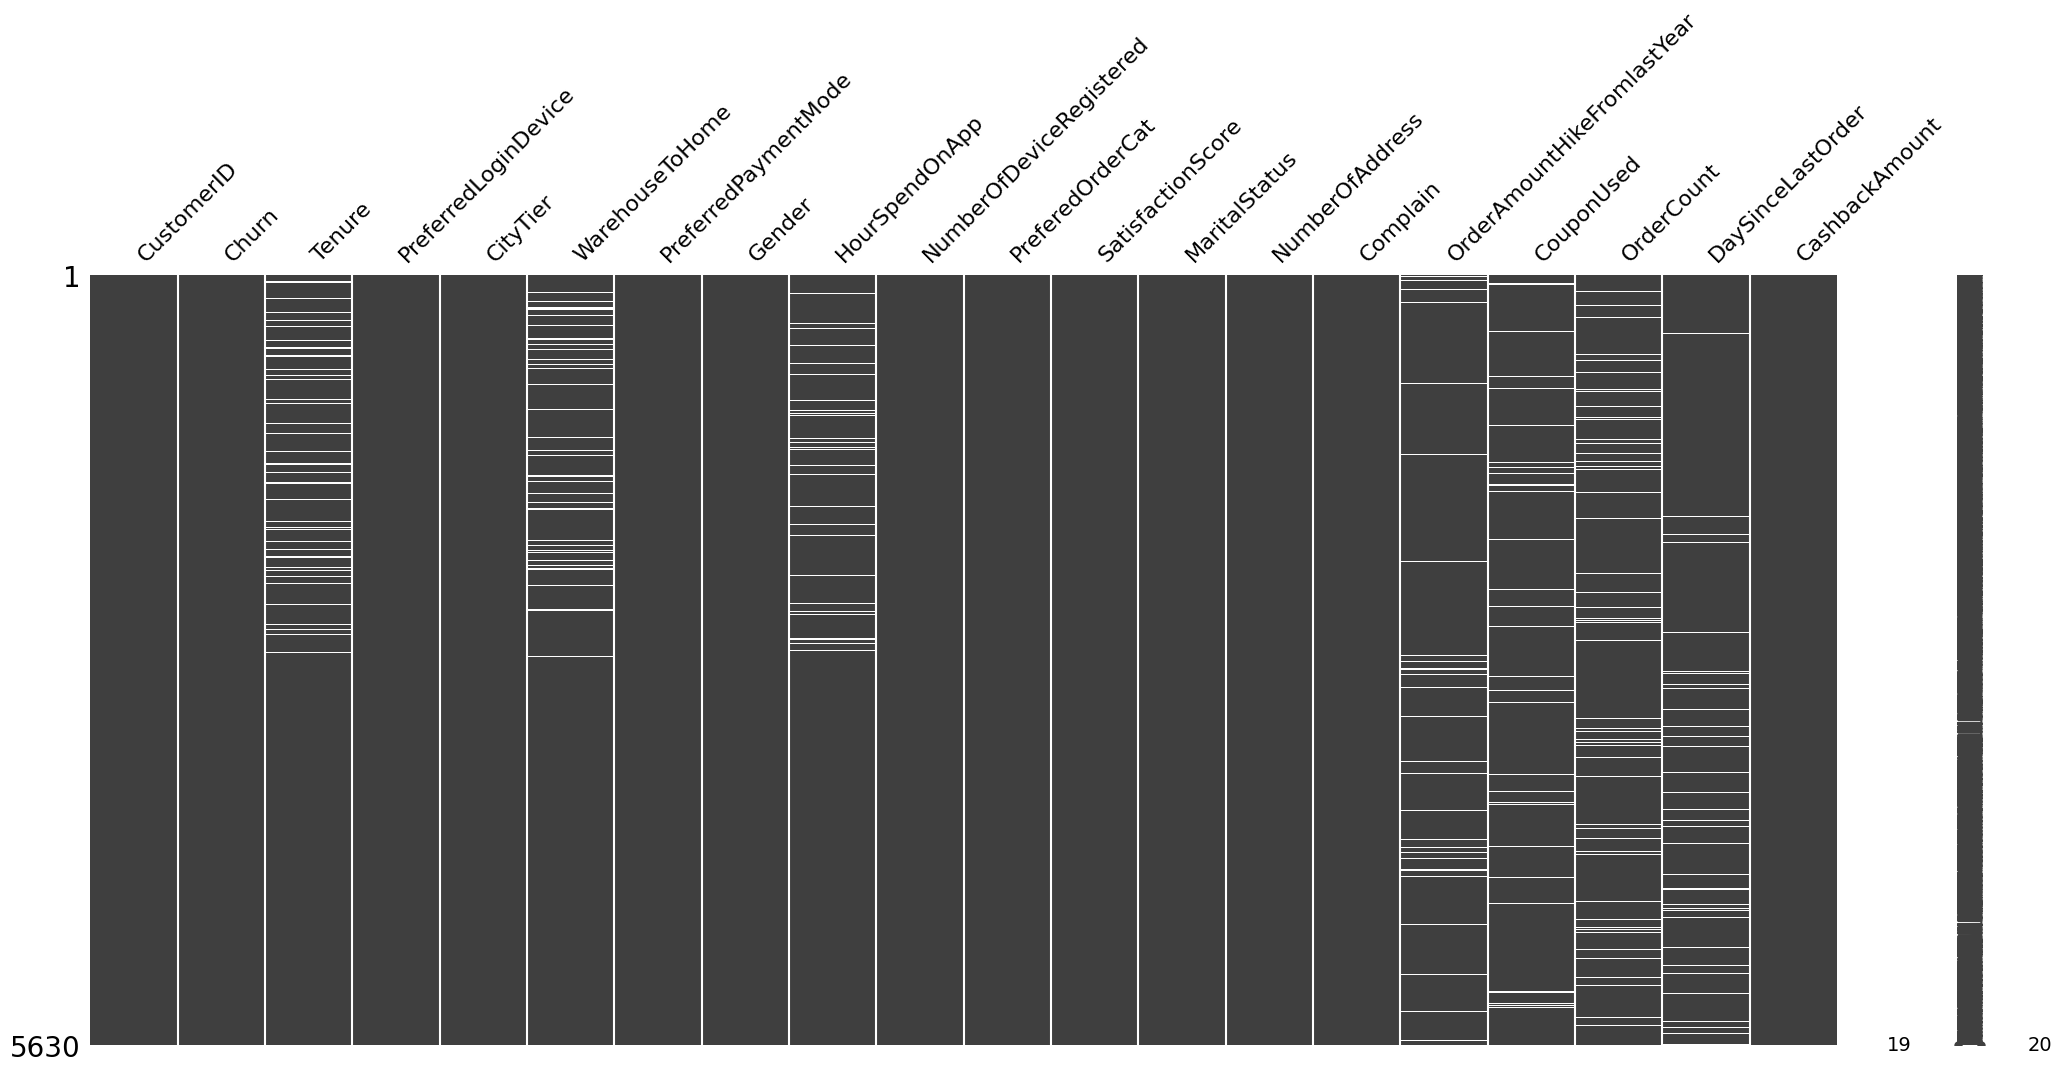

In [ ]:
msno.matrix(df)

Based on the missing value matrix, the pattern appears to be random.

## Numerical Data

In [ ]:
numeric = df.select_dtypes(include='number') # Only columns containing integers and floats will be included
numeric

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,1,13.0,3.0,5,5,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
round(numeric.describe(), 2)

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.00,5630.00,5366.00,5630.00,5379.00,5375.00,5630.00,5630.00,5630.00,5630.00,5365.00,5374.00,5372.00,5323.00,5630.00
mean,52815.50,0.17,10.19,1.65,15.64,2.93,3.69,3.07,4.21,0.28,15.71,1.75,3.01,4.54,177.22
std,1625.39,0.37,8.56,0.92,8.53,0.72,1.02,1.38,2.58,0.45,3.68,1.89,2.94,3.65,49.21
min,50001.00,0.00,0.00,1.00,5.00,0.00,1.00,1.00,1.00,0.00,11.00,0.00,1.00,0.00,0.00
25%,51408.25,0.00,2.00,1.00,9.00,2.00,3.00,2.00,2.00,0.00,13.00,1.00,1.00,2.00,145.77
50%,52815.50,0.00,9.00,1.00,14.00,3.00,4.00,3.00,3.00,0.00,15.00,1.00,2.00,3.00,163.28
75%,54222.75,0.00,16.00,3.00,20.00,3.00,4.00,4.00,6.00,1.00,18.00,2.00,3.00,7.00,196.39
max,55630.00,1.00,61.00,3.00,127.00,5.00,6.00,5.00,22.00,1.00,26.00,16.00,16.00,46.00,324.99


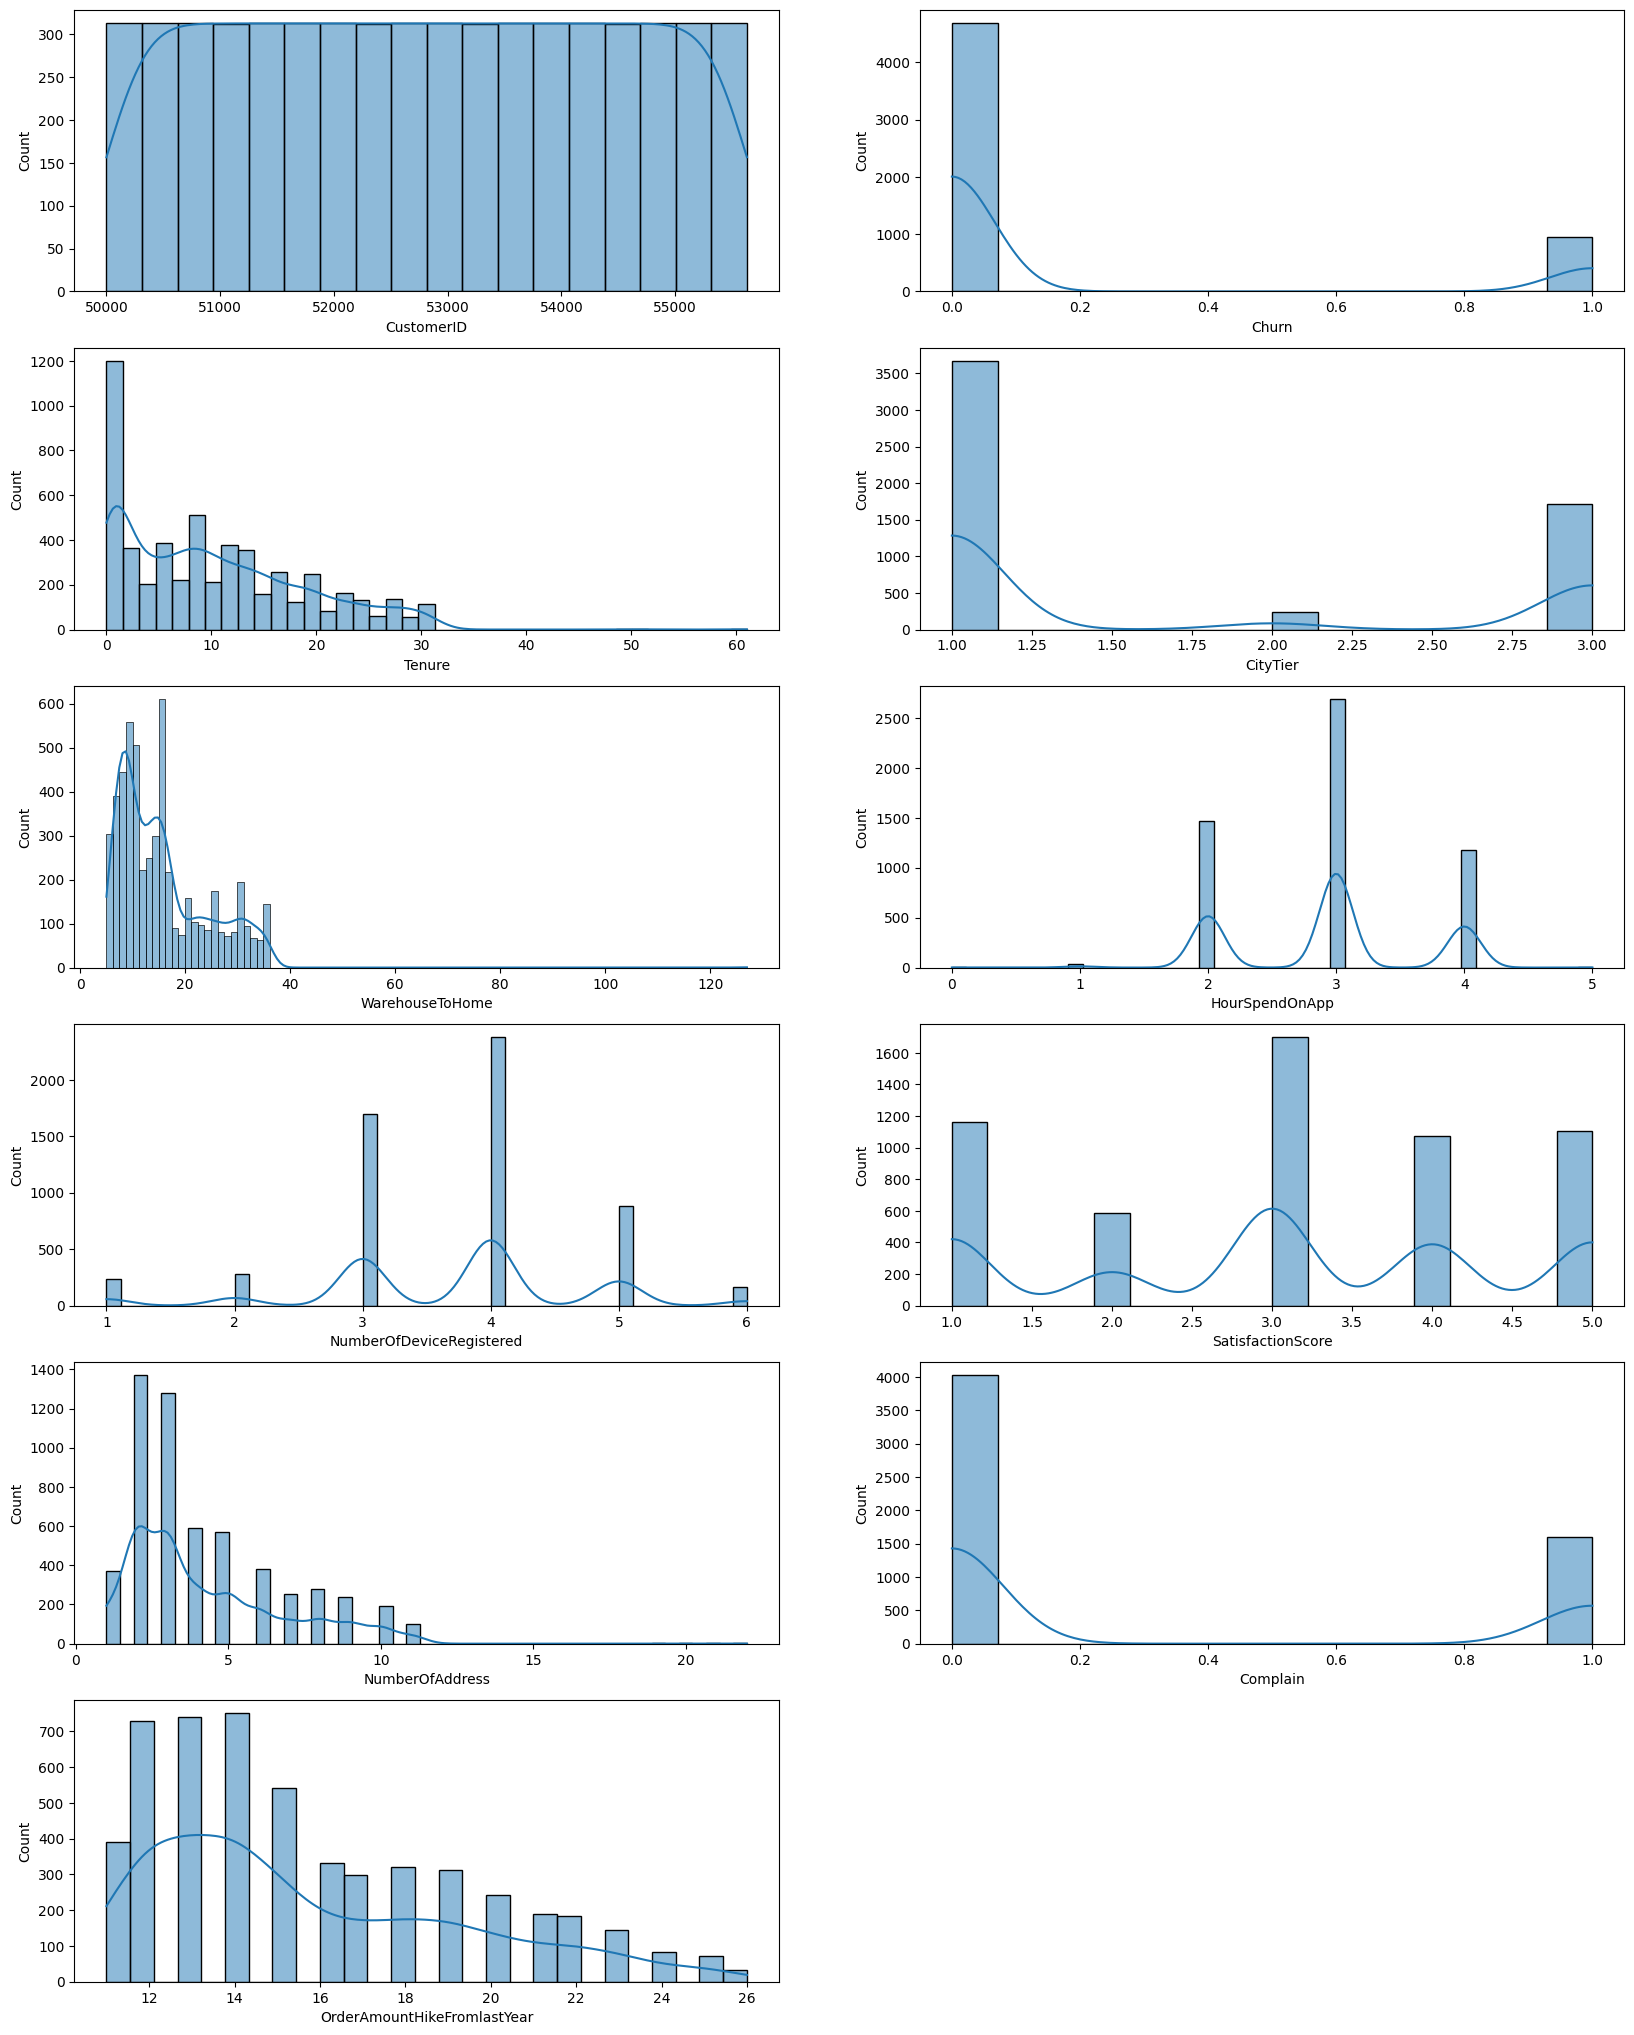

In [ ]:
# Visualize data distribution
# Set the size of the figure
plt.figure(figsize = (20,30)) # column, row

for position, column_name in zip(range(1,12), numeric.columns):
    plt.subplot(7,2,position) # number of rows, number of columns, position
    sns.histplot(df[column_name], kde = True)

plt.show()

--- Dijelaskan berdasarkan inspeksi visual di atas, kalau tidak ada yang normal (membentuk bell shape --

## Normality Check

In [ ]:
# Before investigating normality checks, missing values should be removed first.

df_copy = df.copy()
df_copy.dropna(inplace=True)

### Kolmogrov Smirnov

In [ ]:
# Kolmogorov-Smirnov Test

for column_name in numeric.columns:
    stat, pval = kstest(df_copy[column_name], 'norm')
    if pval < 0.05:
        print(f'Column {column_name} is not normally distributed (Reject H0)')
    else:
        print(f'Column {column_name} is normally distributed (Fail to reject H0)')

Column CustomerID is not normally distributed (Reject H0)
Column Churn is not normally distributed (Reject H0)
Column Tenure is not normally distributed (Reject H0)
Column CityTier is not normally distributed (Reject H0)
Column WarehouseToHome is not normally distributed (Reject H0)
Column HourSpendOnApp is not normally distributed (Reject H0)
Column NumberOfDeviceRegistered is not normally distributed (Reject H0)
Column SatisfactionScore is not normally distributed (Reject H0)
Column NumberOfAddress is not normally distributed (Reject H0)
Column Complain is not normally distributed (Reject H0)
Column OrderAmountHikeFromlastYear is not normally distributed (Reject H0)
Column CouponUsed is not normally distributed (Reject H0)
Column OrderCount is not normally distributed (Reject H0)
Column DaySinceLastOrder is not normally distributed (Reject H0)
Column CashbackAmount is not normally distributed (Reject H0)


### D'Agustino Pearson

In [ ]:
# D'Agustino Pearson Test
from scipy.stats import normaltest

for Column in numeric.columns:
    stat, pval = normaltest(df_copy[Column])
    if pval < 0.05:
        print(f'Column {Column} is not normally distributed (Reject H0)')
    else:
        print(f'Column {Column} is normally distributed (Fail to reject H0)')

Column CustomerID is not normally distributed (Reject H0)
Column Churn is not normally distributed (Reject H0)
Column Tenure is not normally distributed (Reject H0)
Column CityTier is not normally distributed (Reject H0)
Column WarehouseToHome is not normally distributed (Reject H0)
Column HourSpendOnApp is not normally distributed (Reject H0)
Column NumberOfDeviceRegistered is not normally distributed (Reject H0)
Column SatisfactionScore is not normally distributed (Reject H0)
Column NumberOfAddress is not normally distributed (Reject H0)
Column Complain is not normally distributed (Reject H0)
Column OrderAmountHikeFromlastYear is not normally distributed (Reject H0)
Column CouponUsed is not normally distributed (Reject H0)
Column OrderCount is not normally distributed (Reject H0)
Column DaySinceLastOrder is not normally distributed (Reject H0)
Column CashbackAmount is not normally distributed (Reject H0)


### Liliefors Normality Test

In [ ]:
from statsmodels.stats.diagnostic import lilliefors

print("Liliefors Test for Normality Test")

for column in numeric.columns:
    stat, pval = lilliefors(df_copy[column])
    if pval < 0.05:
        print(f'Column {column} is not normally distributed (Reject H0)')
    else:
        print(f'Column {column} is normally distributed (Fail to reject H0)')


Liliefors Test for Normality Test
Column CustomerID is not normally distributed (Reject H0)
Column Churn is not normally distributed (Reject H0)
Column Tenure is not normally distributed (Reject H0)
Column CityTier is not normally distributed (Reject H0)
Column WarehouseToHome is not normally distributed (Reject H0)
Column HourSpendOnApp is not normally distributed (Reject H0)
Column NumberOfDeviceRegistered is not normally distributed (Reject H0)
Column SatisfactionScore is not normally distributed (Reject H0)
Column NumberOfAddress is not normally distributed (Reject H0)
Column Complain is not normally distributed (Reject H0)
Column OrderAmountHikeFromlastYear is not normally distributed (Reject H0)
Column CouponUsed is not normally distributed (Reject H0)
Column OrderCount is not normally distributed (Reject H0)
Column DaySinceLastOrder is not normally distributed (Reject H0)
Column CashbackAmount is not normally distributed (Reject H0)


To assess the distribution of numerical variables, three statistical tests were conducted: Kolmogorov-Smirnov, D’Agostino-Pearson, and Liliefors Normality Test. Prior to testing, all rows with missing values were removed to ensure accurate results.

Across all three tests, every numerical variable failed the normality assumption (p-value < 0.05).  Since none of the variables are normally distributed, it is appropriate to use non-parametric statistics. Therefore, the median is chosen as the measure of central tendency when imputing missing values, instead of the mean.

## Outliers

In [ ]:
# Outliers

for column_name in numeric.columns:
    q3 = df_copy[column_name].quantile(0.75)
    q1 = df_copy[column_name].quantile(0.25)
    iqr = q3 - q1
    upper_bound = q3 + (iqr * 1.5)
    lower_bound = q1 - (iqr * 1.5)
    outlier_count = len(df_copy[(df_copy[column_name] > upper_bound) | (df_copy[column_name] < lower_bound)])
    print(f'Number of outliers in {column_name}: {outlier_count}')

Number of outliers in CustomerID: 0
Number of outliers in Churn: 631
Number of outliers in Tenure: 2
Number of outliers in CityTier: 0
Number of outliers in WarehouseToHome: 2
Number of outliers in HourSpendOnApp: 4
Number of outliers in NumberOfDeviceRegistered: 262
Number of outliers in SatisfactionScore: 0
Number of outliers in NumberOfAddress: 3
Number of outliers in Complain: 0
Number of outliers in OrderAmountHikeFromlastYear: 23
Number of outliers in CouponUsed: 397
Number of outliers in OrderCount: 422
Number of outliers in DaySinceLastOrder: 23
Number of outliers in CashbackAmount: 41


--- Di sini dijelasin kalau Churn itu diabaikan karena nilai Churn hanya ada dua: 0 dan 1, wajar juga kalau Churn itu outliers karena tidak mungkin nilai Churn itu proporsional --

In [ ]:
# Identify rows with outliers in 'Tenure'

q3 = df_copy['Tenure'].quantile(0.75)
q1 = df_copy['Tenure'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

outliers_Tenure = df_copy[(df_copy['Tenure'] > upper_bound) | (df_copy['Tenure'] < lower_bound)]

# Display the rows with outliers
print("Rows with outliers in 'Tenure':")
outliers_Tenure

Rows with outliers in 'Tenure':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.0
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.0


Based on the table above, it is reasonable that some customers are very loyal. They have a tenure of more than 50 months (over 4 years). Therefore, even though these are outlier data points, they are valid and we have decided to keep them.

In [ ]:
# Identify rows with outliers in 'WarehouseToHome'
q3 = df_copy['WarehouseToHome'].quantile(0.75)
q1 = df_copy['WarehouseToHome'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

outliers_warehousetohome = df_copy[(df_copy['WarehouseToHome'] > upper_bound) | (df_copy['WarehouseToHome'] < lower_bound)]

# Display the rows with outliers
print("Rows with outliers in 'WarehouseToHome':")
outliers_warehousetohome

Rows with outliers in 'WarehouseToHome':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


--- Di sini dijelasin kalau ini wajar --

In [ ]:
# Identify rows with outliers in 'HourSpendOnApp'
q3 = df_copy['HourSpendOnApp'].quantile(0.75)
q1 = df_copy['HourSpendOnApp'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

outliers_HourSpendOnApp = df_copy[(df_copy['HourSpendOnApp'] > upper_bound) | (df_copy['HourSpendOnApp'] < lower_bound)]

# Display the rows with outliers
print("Rows with outliers in 'HourSpendOnApp':")
outliers_HourSpendOnApp

Rows with outliers in 'HourSpendOnApp':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1950,51951,0,11.0,Computer,1,18.0,Debit Card,Male,0.0,4,Laptop & Accessory,5,Married,3,0,15.0,1.0,1.0,2.0,162.88
4223,54224,0,31.0,Mobile Phone,3,32.0,Debit Card,Female,5.0,4,Fashion,5,Single,9,0,12.0,7.0,8.0,10.0,201.37
4248,54249,0,4.0,Mobile Phone,1,9.0,Debit Card,Male,5.0,5,Laptop & Accessory,1,Married,3,0,20.0,4.0,11.0,9.0,166.52
4351,54352,0,1.0,Phone,1,16.0,Credit Card,Female,5.0,4,Mobile Phone,4,Single,3,0,17.0,1.0,2.0,4.0,147.79


In [ ]:
# Identify rows with outliers in 'NumberOfDeviceRegistered'
q3 = df_copy['NumberOfDeviceRegistered'].quantile(0.75)
q1 = df_copy['NumberOfDeviceRegistered'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)

outliers_NumberOfDeviceRegistered = df_copy[(df_copy['NumberOfDeviceRegistered'] > upper_bound) | (df_copy['NumberOfDeviceRegistered'] < lower_bound)]

# Display the rows with outliers
print("Rows with outliers in 'NumberOfDeviceRegistered':")
outliers_NumberOfDeviceRegistered

Rows with outliers in 'NumberOfDeviceRegistered':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
441,50442,1,10.0,Computer,3,33.0,Debit Card,Female,3.0,1,Laptop & Accessory,3,Single,5,1,12.0,1.0,1.0,3.0,163.97
449,50450,0,7.0,Phone,1,6.0,Debit Card,Female,3.0,1,Mobile,2,Single,3,0,16.0,0.0,1.0,3.0,132.80
453,50454,0,11.0,Computer,1,8.0,Debit Card,Female,3.0,1,Laptop & Accessory,5,Single,7,1,12.0,4.0,4.0,12.0,159.80
457,50458,0,13.0,Computer,1,8.0,Credit Card,Female,2.0,1,Laptop & Accessory,4,Divorced,2,0,24.0,0.0,3.0,7.0,142.44
493,50494,0,0.0,Phone,1,8.0,CC,Male,3.0,1,Mobile,5,Single,8,0,13.0,1.0,1.0,1.0,134.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,55527,0,13.0,Computer,3,28.0,Debit Card,Female,3.0,6,Laptop & Accessory,3,Married,8,0,20.0,1.0,2.0,3.0,182.36
5549,55550,0,5.0,Computer,1,8.0,Debit Card,Male,3.0,6,Laptop & Accessory,5,Married,3,0,22.0,7.0,9.0,8.0,175.03
5562,55563,0,5.0,Phone,1,9.0,Credit Card,Female,3.0,6,Mobile Phone,1,Married,3,1,12.0,1.0,2.0,1.0,136.29
5607,55608,0,10.0,Computer,3,22.0,E wallet,Male,3.0,6,Laptop & Accessory,1,Married,3,0,25.0,6.0,12.0,12.0,179.06


In [ ]:
# Number of Address

q1 = df_copy['NumberOfAddress'].quantile(0.25)
q3 = df_copy['NumberOfAddress'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_NumberOfAddress = df_copy[(df_copy['NumberOfAddress'] < lower_bound) | (df_copy['NumberOfAddress'] > upper_bound)]
print("Rows with outliers in 'NumberOfAddress':")
outliers_NumberOfAddress


Rows with outliers in 'NumberOfAddress':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3075,53076,1,1.0,Computer,1,11.0,COD,Male,3.0,4,Mobile Phone,2,Single,20,1,24.0,2.0,2.0,1.0,147.85
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


In [ ]:
# OrderAmountHikeFromlastYear

q1 = df_copy['OrderAmountHikeFromlastYear'].quantile(0.25)
q3 = df_copy['OrderAmountHikeFromlastYear'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_OrderAmountHike = df_copy[(df_copy['OrderAmountHikeFromlastYear'] < lower_bound) | (df_copy['OrderAmountHikeFromlastYear'] > upper_bound)]
print("Rows with outliers in 'OrderAmountHikeFromlastYear':")
outliers_OrderAmountHike


Rows with outliers in 'OrderAmountHikeFromlastYear':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2971,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3124,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
3366,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14
3543,53544,0,1.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Mobile Phone,5,Single,3,0,26.0,1.0,2.0,1.0,150.52
3565,53566,0,18.0,Mobile Phone,1,36.0,UPI,Male,3.0,4,Laptop & Accessory,2,Single,3,0,26.0,2.0,2.0,18.0,170.41
3582,53583,1,1.0,Computer,1,17.0,Credit Card,Female,4.0,5,Mobile Phone,4,Single,3,1,26.0,2.0,2.0,1.0,143.59
3761,53762,0,23.0,Mobile Phone,1,10.0,Credit Card,Female,3.0,5,Laptop & Accessory,5,Divorced,6,0,26.0,2.0,2.0,3.0,172.89
3777,53778,0,8.0,Phone,3,14.0,COD,Male,3.0,4,Mobile Phone,3,Married,2,1,26.0,1.0,6.0,8.0,148.08
3888,53889,0,7.0,Computer,3,23.0,Debit Card,Female,3.0,4,Laptop & Accessory,1,Married,3,1,26.0,1.0,2.0,3.0,178.68
3997,53998,0,2.0,Mobile Phone,1,7.0,Credit Card,Female,4.0,4,Mobile Phone,5,Married,3,0,26.0,2.0,2.0,3.0,160.91


In [ ]:
# The use of coupon

q1 = df_copy['CouponUsed'].quantile(0.25)
q3 = df_copy['CouponUsed'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_CouponUsed = df_copy[(df_copy['CouponUsed'] < lower_bound) | (df_copy['CouponUsed'] > upper_bound)]
print("Rows with outliers in 'CouponUsed':")
outliers_CouponUsed


Rows with outliers in 'CouponUsed':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
20,50021,1,0.0,Mobile Phone,3,12.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Divorced,5,1,18.0,6.0,7.0,7.0,161.72
21,50022,1,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203.12
53,50054,0,19.0,Mobile Phone,3,6.0,E wallet,Female,3.0,3,Fashion,5,Married,2,0,25.0,4.0,15.0,7.0,204.53
85,50086,1,0.0,Mobile Phone,3,10.0,Credit Card,Male,2.0,5,Fashion,2,Divorced,2,0,11.0,7.0,9.0,8.0,204.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,55565,0,16.0,Computer,1,30.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,3,0,13.0,4.0,4.0,8.0,168.32
5569,55570,0,14.0,Computer,1,18.0,COD,Female,4.0,4,Laptop & Accessory,3,Married,3,0,12.0,8.0,10.0,5.0,188.23
5585,55586,0,7.0,Mobile Phone,1,22.0,Credit Card,Female,4.0,4,Laptop & Accessory,1,Married,2,1,14.0,7.0,9.0,2.0,173.78
5604,55605,1,20.0,Phone,1,14.0,COD,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.0,9.0,148.39


In [ ]:
# Order count

q1 = df_copy['OrderCount'].quantile(0.25)
q3 = df_copy['OrderCount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_OrderCount = df_copy[(df_copy['OrderCount'] < lower_bound) | (df_copy['OrderCount'] > upper_bound)]
print("Rows with outliers in 'OrderCount':")
outliers_OrderCount


Rows with outliers in 'OrderCount':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
20,50021,1,0.0,Mobile Phone,3,12.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Divorced,5,1,18.0,6.0,7.0,7.0,161.72
21,50022,1,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203.12
42,50043,0,3.0,Mobile Phone,3,11.0,Debit Card,Female,2.0,3,Fashion,2,Divorced,3,0,12.0,2.0,7.0,4.0,194.19
53,50054,0,19.0,Mobile Phone,3,6.0,E wallet,Female,3.0,3,Fashion,5,Married,2,0,25.0,4.0,15.0,7.0,204.53
85,50086,1,0.0,Mobile Phone,3,10.0,Credit Card,Male,2.0,5,Fashion,2,Divorced,2,0,11.0,7.0,9.0,8.0,204.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,55570,0,14.0,Computer,1,18.0,COD,Female,4.0,4,Laptop & Accessory,3,Married,3,0,12.0,8.0,10.0,5.0,188.23
5578,55579,0,12.0,Computer,1,13.0,Debit Card,Male,4.0,5,Laptop & Accessory,3,Married,4,0,12.0,3.0,8.0,8.0,178.21
5585,55586,0,7.0,Mobile Phone,1,22.0,Credit Card,Female,4.0,4,Laptop & Accessory,1,Married,2,1,14.0,7.0,9.0,2.0,173.78
5604,55605,1,20.0,Phone,1,14.0,COD,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.0,9.0,148.39


In [ ]:
# Day Since Last Order / Frequency

q1 = df_copy['DaySinceLastOrder'].quantile(0.25)
q3 = df_copy['DaySinceLastOrder'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_DaySinceLastOrder = df_copy[(df_copy['DaySinceLastOrder'] < lower_bound) | (df_copy['DaySinceLastOrder'] > upper_bound)]
print("Rows with outliers in 'DaySinceLastOrder':")
outliers_DaySinceLastOrder


Rows with outliers in 'DaySinceLastOrder':


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
510,50511,0,8.0,Mobile Phone,1,15.0,Debit Card,Female,3.0,4,Fashion,3,Divorced,2,1,20.0,2.0,5.0,15.0,206.85
561,50562,0,14.0,Phone,1,12.0,Credit Card,Male,2.0,3,Mobile Phone,5,Single,3,1,13.0,1.0,2.0,17.0,147.21
750,50751,0,17.0,Phone,1,35.0,UPI,Male,2.0,3,Laptop & Accessory,2,Single,2,0,25.0,1.0,1.0,17.0,145.41
801,50802,0,16.0,Mobile Phone,3,10.0,E wallet,Female,2.0,4,Fashion,2,Single,4,0,14.0,10.0,15.0,17.0,202.31
1373,51374,0,17.0,Mobile Phone,1,13.0,Credit Card,Female,2.0,4,Fashion,1,Married,4,0,14.0,0.0,5.0,17.0,202.48
1490,51491,0,3.0,Phone,1,11.0,COD,Female,2.0,3,Mobile,5,Married,6,0,14.0,0.0,2.0,30.0,132.04
1980,51981,0,8.0,Mobile Phone,1,15.0,Debit Card,Female,3.0,4,Fashion,3,Married,2,1,20.0,3.0,5.0,15.0,206.85
2031,52032,0,14.0,Phone,1,12.0,Credit Card,Male,2.0,3,Mobile Phone,5,Single,3,1,13.0,1.0,2.0,17.0,147.21
2040,52041,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4,Fashion,3,Married,6,0,11.0,5.0,11.0,46.0,206.09
2220,52221,0,17.0,Phone,1,35.0,UPI,Male,2.0,3,Laptop & Accessory,1,Single,2,0,25.0,6.0,13.0,17.0,145.41


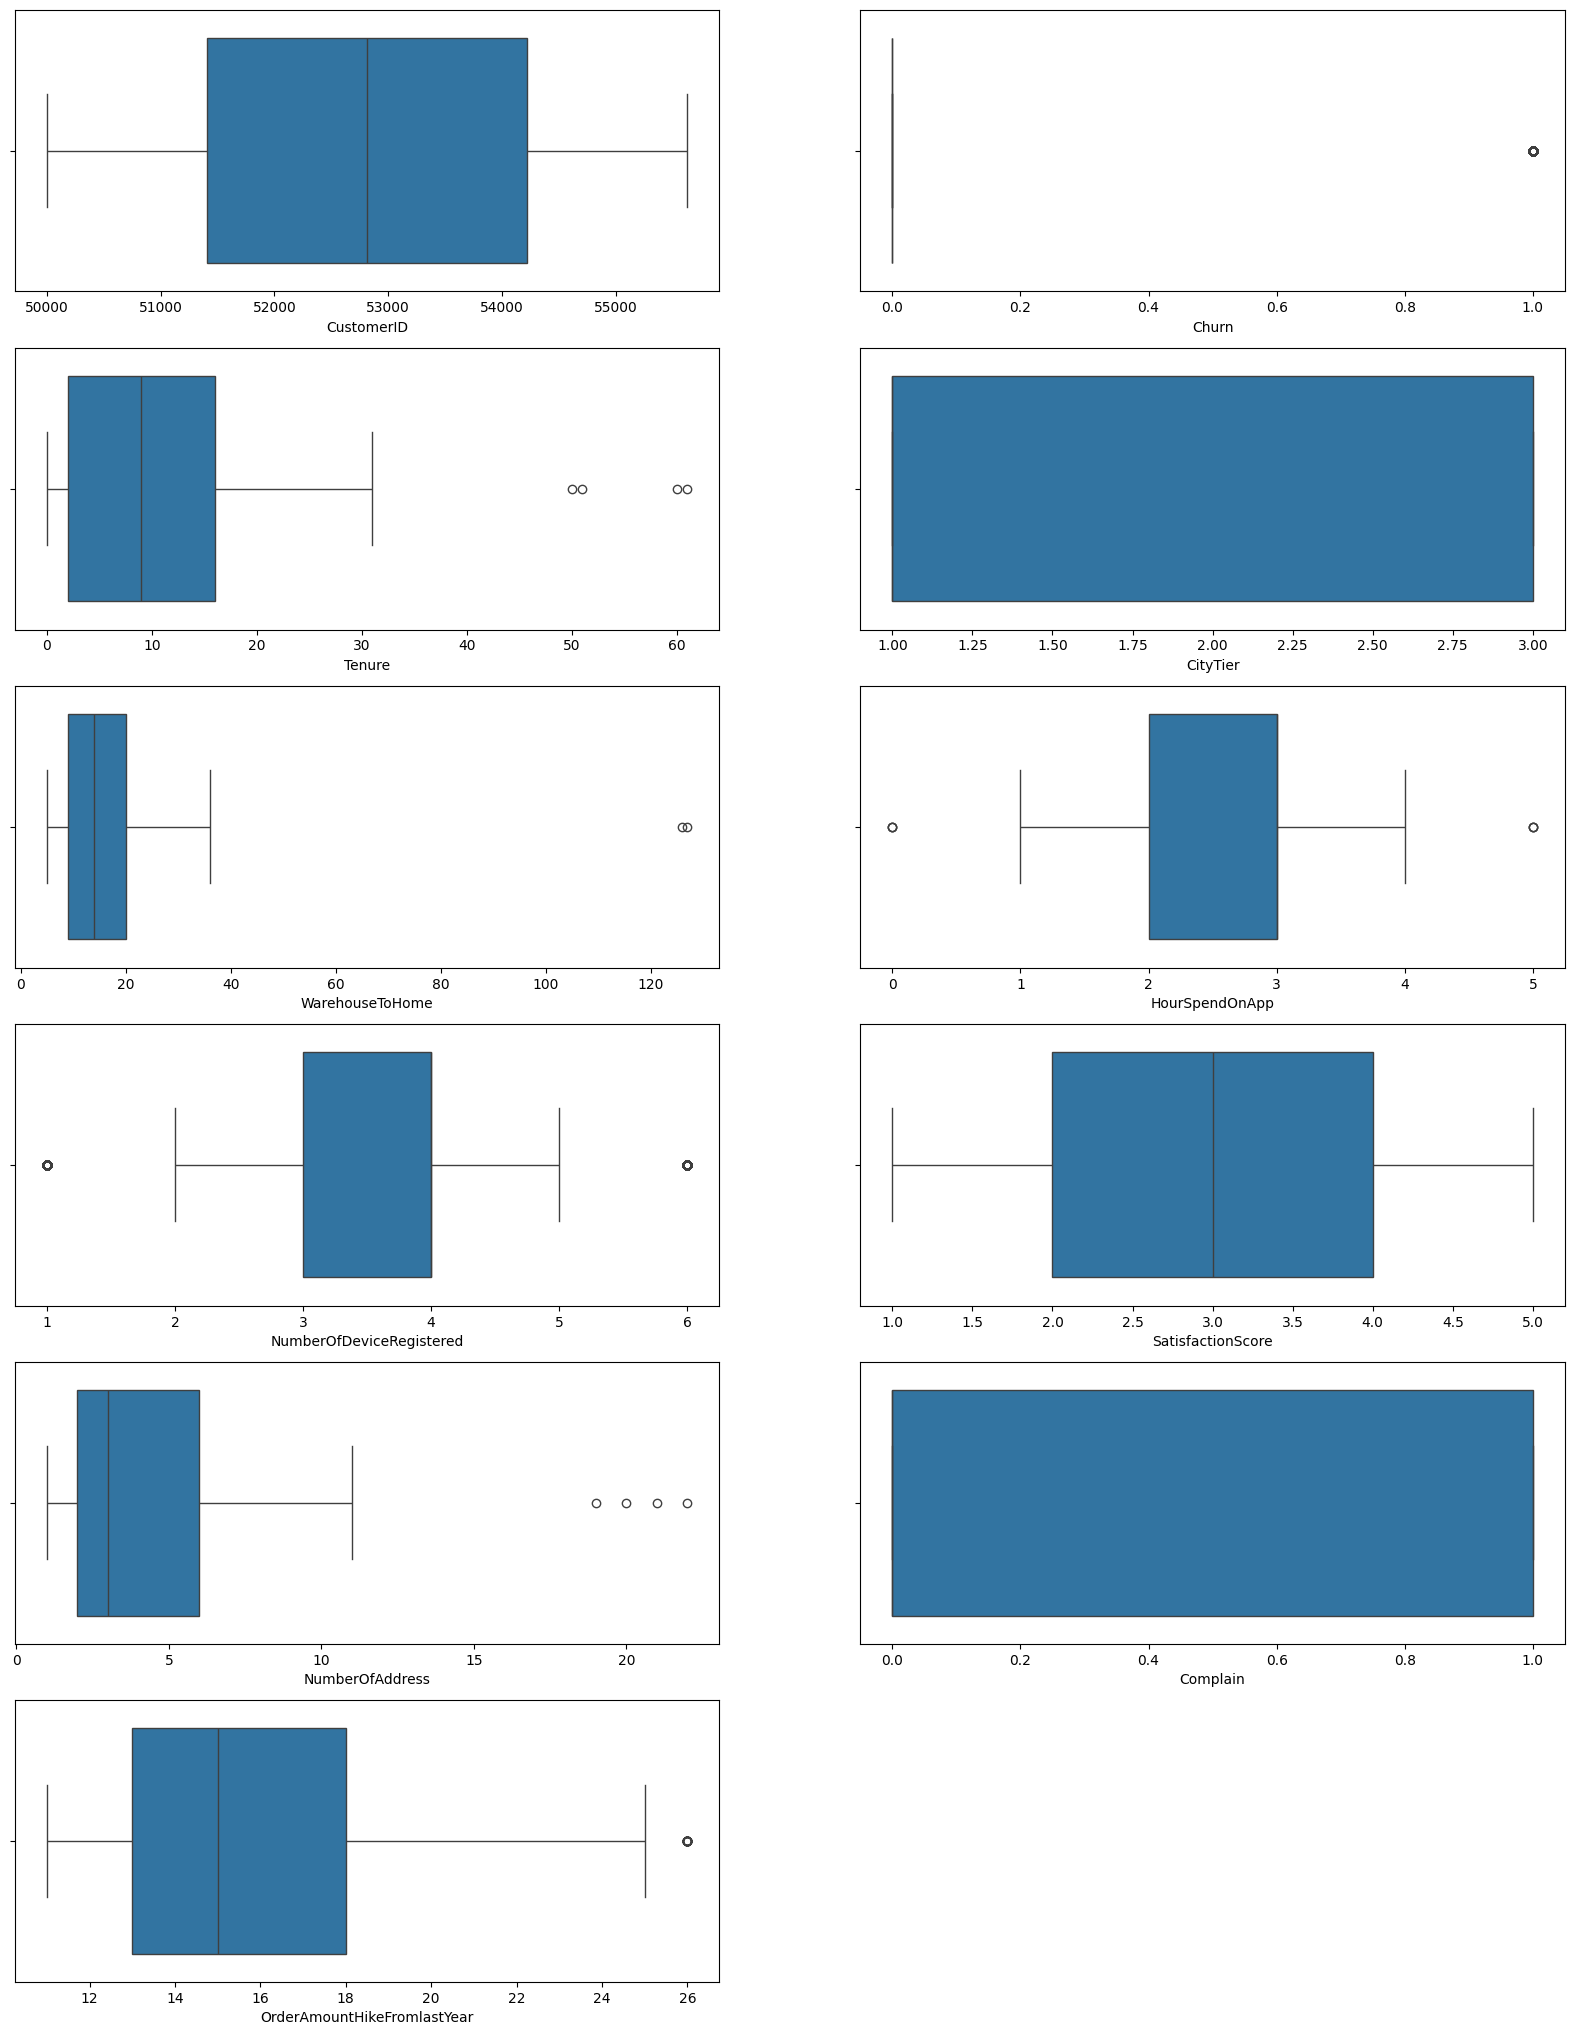

In [ ]:
# Visualization of Outliers using Boxplot

# Setting size for the figure
plt.figure(figsize = (20,30)) # column, row

for position, column_name in zip(range(1,12), numeric.columns): # position 1 to 12
    plt.subplot(7,2,position) # number of rows, number of columns, position
    sns.boxplot(x = df[column_name])

plt.show()

Outliers in the columns Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, NumberOfAddress, and OrderAmountHikeFromlastYear were not handled, as they fell within an acceptable range and were consistent with overall behavioral patterns observed in other variables. These values were considered natural variations rather than anomalies, and were therefore retained during the analysis.

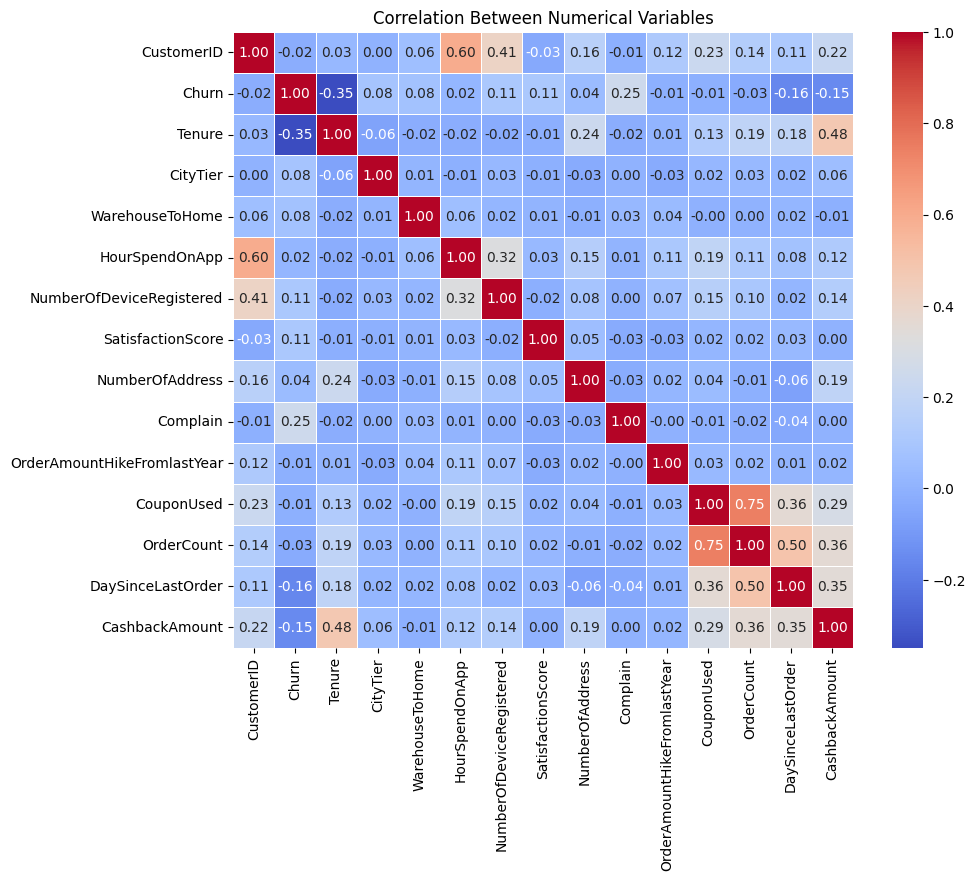

In [ ]:
# Korelasi

numeric.corr()

# Visualisasi Korelasi dengan Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Variables')
plt.show()

## Variable Correlation with Churn

| Variable              | Correlation with `Churn` | Insight                                                                 |
|------------------------|---------------------------|-------------------------------------------------------------------------|
| **Tenure**             | -0.35                     | Customers with longer tenure tend to be more loyal. Tenure is a strong predictor of churn. |
| **Complain**           | -0.25                     | More complaints are associated with a higher likelihood of churn. Better complaint handling is needed. |
| **DaySinceLastOrder**  | -0.16                     | The longer a customer goes without ordering, the higher the risk of churn → indicates passive customers. |
| **CashbackAmount**     | -0.15                     | Lower cashback may lead to higher churn risk. Customers may be sensitive to incentives. |
| **SatisfactionScore**  | 0.11                      | Lower satisfaction scores are slightly associated with higher churn. |

Based on the thresholds for Pearson correlation strength, only the variable `Tenure` shows a moderately strong negative correlation (-0.35) and can be considered meaningful. The other variables show weak correlations.


## Correlation among Variables

| Variable Pair                                 | Correlation | Insight                                                                                                                         |
|-----------------------------------------------|-------------|----------------------------------------------------------------------------------------------------------------------------------|
| **OrderCount & CouponUsed**                   | 0.75        | Coupon usage drives transactions → coupons are effective promotional tools.                                                      |
| **OrderCount & CashbackAmount**               | 0.36        | More transactions lead to more cashback. This is reasonable and can support a reward-based retention program.                    |
| **DaySinceLastOrder & OrderCount**            | -0.50       | Customers who haven't ordered in a while usually have low order counts → suitable for reactivation strategy.                    |
| **OrderCount & OrderAmountHikeFromLastYear**  | 0.29        | Frequent buyers tend to increase their order value → loyal customers tend to spend more.                                         |
| **HourSpendOnApp & NumberOfDeviceRegistered** | 0.32        | More registered devices are associated with higher app engagement → potential for mobile campaign targeting.                     |


Based on the correlation analysis among variables, several strong relationships emerge. The strongest positive correlation is between `OrderCount` and `CouponUsed` (0.75), suggesting that coupon usage effectively drives customer transactions. This insight supports the use of coupons as a promotional strategy.

There is also a moderate positive correlation between `OrderCount` and `CashbackAmount` (0.36), indicating that frequent buyers tend to receive more cashback, which can be used to build a reward-based customer retention program.

Interestingly, `DaySinceLastOrder` and `OrderCount` show a strong negative correlation (-0.50), meaning that customers who haven't ordered in a long time tend to have a low total order count. This insight is useful for identifying inactive or passive users and targeting them with reactivation campaigns.

Other moderate correlations such as between `OrderCount` and `OrderAmountHikeFromLastYear` (0.29), and `HourSpendOnApp` and `NumberOfDeviceRegistered` (0.32), show patterns of increasing customer engagement and digital device usage that could be leveraged for personalized marketing and loyalty efforts.

## Visual Inspection of Categorical Data

In [ ]:
categorical = df_copy.select_dtypes(include='object') # selecting columns containing strings (object type)
categorical.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
5,Computer,Debit Card,Female,Mobile Phone,Single
11,Mobile Phone,Debit Card,Male,Fashion,Single
12,Phone,COD,Male,Mobile,Single


In [ ]:
categorical.nunique()

,0
PreferredLoginDevice,3
PreferredPaymentMode,7
Gender,2
PreferedOrderCat,6
MaritalStatus,3


In [ ]:
categorical.describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,3774,3774,3774,3774,3774
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,1936,1538,2271,1961,1982


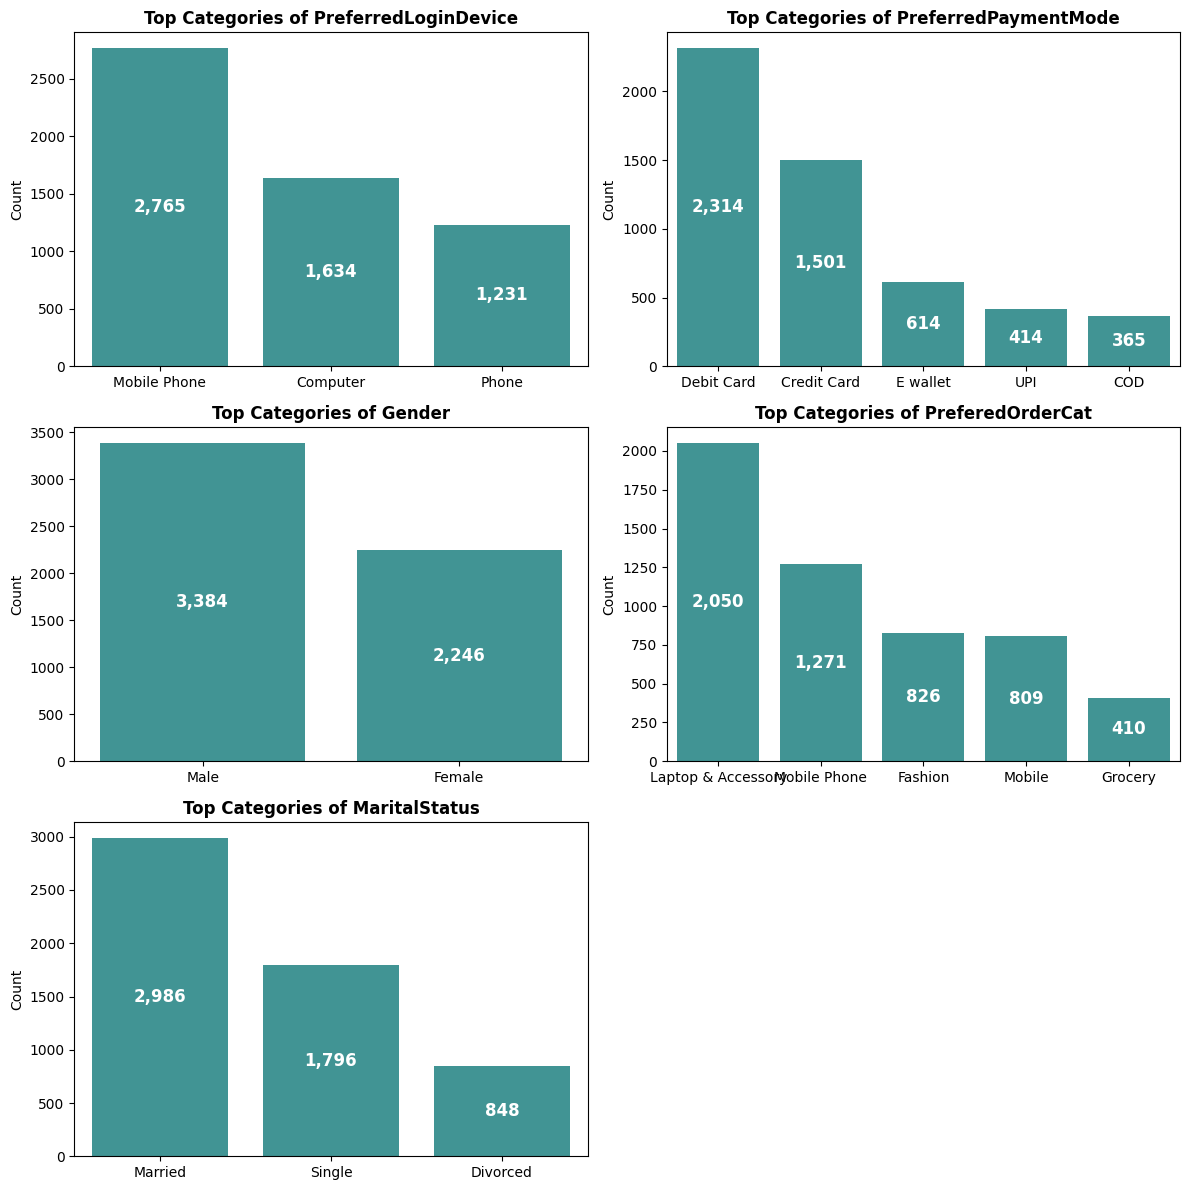

In [ ]:
# number of categories
num_columns = len(categorical.columns)
rows = (num_columns // 2) + (num_columns % 2)  # Specifies the number of rows (max 2 columns per row)

fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))  # subplot grid
axes = axes.flatten()  # Flatten for indexing

# Looping for every categorical column
for i, column_name in enumerate(categorical.columns):
    category_counts = df[column_name].value_counts().head(5)  # top 5 category

    sns.barplot(x=category_counts.index, y=category_counts.values,
                color="darkcyan", alpha=0.8, ax=axes[i])  # use axes[i]

    # add quantity labels in each column
    axes[i].bar_label(axes[i].containers[0], labels=[f'{x:,.0f}' for x in category_counts.values],
                      label_type='center', color="white", fontsize=12, fontweight='bold')

    axes[i].set_title(f"Top Categories of {column_name}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# drop empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretation:**

- Login Device: The majority use mobile phones — ensure optimal UX for the mobile version, and consider adding push notifications via the app to increase retention.
- Payment Method: Mostly debit cards and credit cards — this can be optimized through bank partnerships and user promotions.
- Gender: Male users dominate — marketing strategies can be tailored by gender, but it's important to analyze customer purchasing behavior further.
- Marital Status: Mostly married — consider bundled product offers in household-related categories.
- Order Category: Tech is the dominant category, while grocery is low — this area can be improved.

**Problem:**

The tech category is much higher than grocery. Possible reasons include:
- Grocery buyers may not yet be fully accustomed to digital shopping.
- Grocery items require fast delivery to maintain freshness and product quality.
- E-commerce platforms may promote tech products more often due to higher transaction amounts and greater discount potential.

# Data Preparation

### Category Merge

In [ ]:
# show all unique values
cat_val = ['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredPaymentMode']

for cat in cat_val:
    print(f'Unique value dari {cat} = {df[cat].unique()}')

Unique value dari PreferredLoginDevice = ['Mobile Phone' 'Phone' 'Computer']
Unique value dari Gender = ['Female' 'Male']
Unique value dari MaritalStatus = ['Single' 'Divorced' 'Married']
Unique value dari PreferedOrderCat = ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique value dari PreferredPaymentMode = ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


**Note:** For dataset efficiency,  categories will be merged (for example, "Mobile Phone" and "Phone" will be combined into one).

In [ ]:
# merge unique values
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card', 'COD':'Cash on Delivery'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

cat_val = ['PreferredLoginDevice', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredPaymentMode']

for cat in cat_val:
    print(f'Unique value dari {cat} = {df[cat].unique()}')

Unique value dari PreferredLoginDevice = ['Mobile Phone' 'Computer']
Unique value dari Gender = ['Female' 'Male']
Unique value dari MaritalStatus = ['Single' 'Divorced' 'Married']
Unique value dari PreferedOrderCat = ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique value dari PreferredPaymentMode = ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']


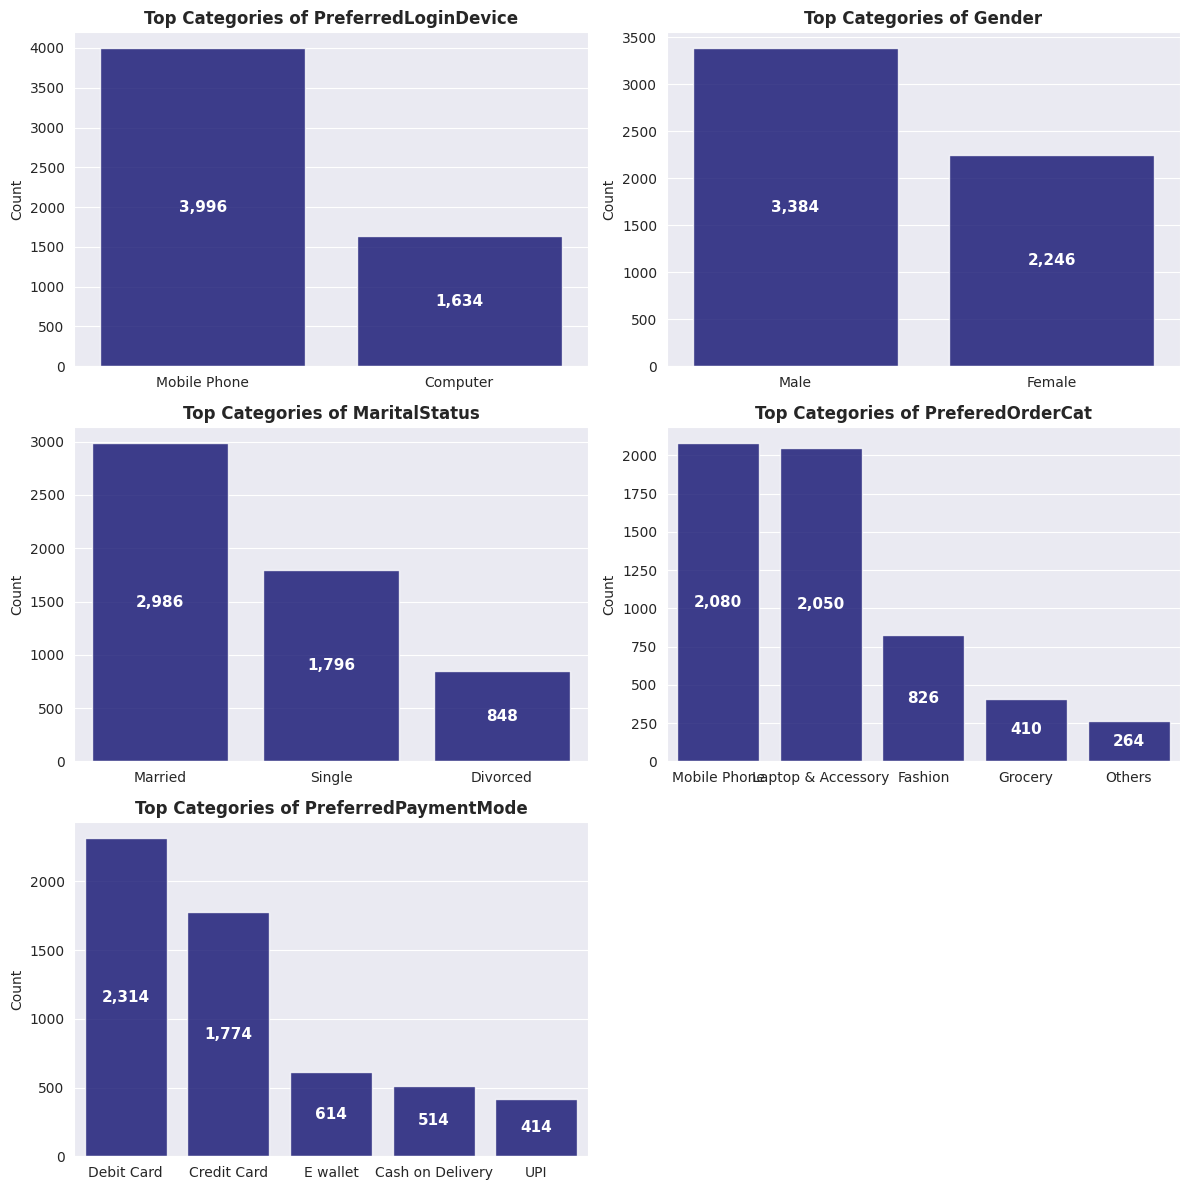

In [ ]:
# Set style seaborn
sns.set_style("darkgrid")

# Automatically determine the number of rows & columns (maximum 2 columns per row)
num_columns = len(cat_val)
rows = (num_columns // 2) + (num_columns % 2)

# Create figures with flexible sizes
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows * 4))
axes = axes.flatten()  # Flatten for easier indexing

# Looping for each category
for i, columns_name in enumerate(cat_val):
    category_counts = df[columns_name].value_counts().head(5)

    # Plot bar chart
    ax = sns.barplot(x=category_counts.index, y=category_counts.values,
                     color="navy", alpha=0.8, ax=axes[i])

    # add data labels
    ax.bar_label(ax.containers[0], labels=[f'{x:,.0f}' for x in category_counts.values],
                 label_type='center', color="white", fontsize=11, fontweight='bold')

    axes[i].set_title(f"Top Categories of {columns_name}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# drop empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# set layout
plt.tight_layout()
plt.show()

### Missing Value Handling

In [ ]:
# The total of missing value before its handling
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
# List kolom numerik yang akan diimputasi
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
            'OrderAmountHikeFromlastYear', 'CouponUsed',
            'OrderCount', 'DaySinceLastOrder']

# Imputasi dengan median
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


/tmp/ipython-input-37-1242206447.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [ ]:
# missing value after handling
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


## Changing Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

for categorical data such as`CityTier`, `SatisfactionScore`, `Complain`, `Churn`, the data type is changed to category

In [ ]:
# Change data type to category
df['CityTier'] = df['CityTier'].astype('category')
df['SatisfactionScore'] = df['SatisfactionScore'].astype('category')
df['Complain'] = df['Complain'].astype('category')
df['Churn'] = df['Churn'].astype('category')

### Saving Merged DataFrame to CSV

In this section, we save the merged DataFrame (e.g., CC and Credit Card into one category) for further analysis, as part of one of the experiments in the machine learning section.

In [ ]:
# df.to_csv('df_clean.csv', index=False)

# Unmark the hashtag to save the data

In [ ]:
from google.colab import files

# files.download('df_clean.csv')

# Unmark the hashtag to save the data

# Explaratory Data Analysis

To gain a deeper understanding of customer behavior and improve retention strategies, an exploratory analysis was conducted on the dataset. This analysis is divided into two parts: descriptive analysis to summarize key customer characteristics and behaviors, and churn prediction to identify patterns and potential drivers of customer churn. The goal is to uncover actionable insights that can support business decisions and enhance customer lifetime value.

A. Descriptive Analysis
- What is the proportion of customers who churned vs. those who didn’t?
- What does the distribution of customer tenure look like?
- What is the average number of transactions/orders per customer?
- Which payment method is used most frequently?
- Which product category has the highest purchase volume?
- What is the most commonly used login device?
- Who churns more: male or female customers?
- Does marital status influence purchasing behavior?

B. Churn Prediction
- Are customers with shorter tenure more likely to churn?
- Does a lower order frequency increase the likelihood of churn?
- Does the number of complaints impact churn?
- Is there a negative correlation between satisfaction score and churn?
- Is the number of days since the last order a strong predictor of churn?
- How does churn behavior vary across product categories (PreferredOrderCat)?
- Are customers who do not use coupons more likely to churn?

## Numerical Data

#### Churn Proportion

/tmp/ipython-input-43-999341992.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


Customer Churn Proportion:
Churn
0    83.16
1    16.84
Name: count, dtype: float64



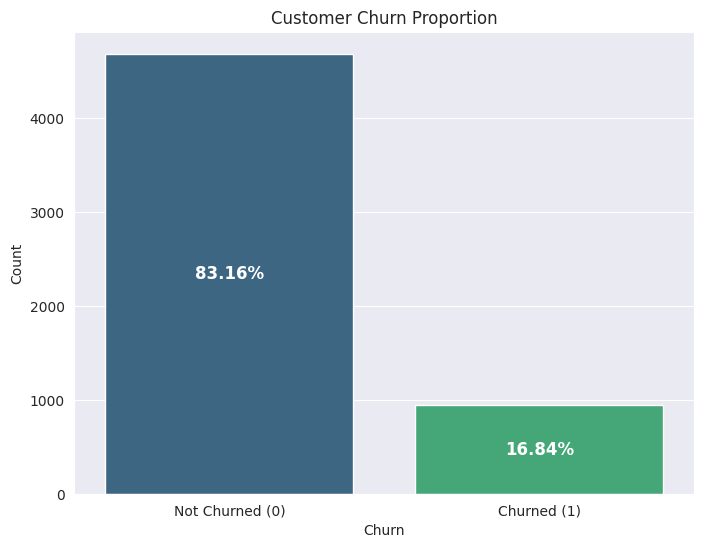

In [ ]:
# Proportion of churned (1) vs non-churned (0) customers
churn_counts = df['Churn'].value_counts()
churn_proportion = churn_counts / churn_counts.sum() * 100
print(f"Customer Churn Proportion:\n{churn_proportion.round(2)}\n")

# Visualizing churn proportion with percentage labels inside the bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Customer Churn Proportion')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Churned (0)', 'Churned (1)'])

# Add percentage labels inside the bars
for p in ax.patches:
    percentage = f"{(p.get_height() / len(df) * 100):.2f}%"
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

#### Tenure vs Churn

In [ ]:
df['Tenure'].value_counts().sort_index().head()

,count
Tenure,
0.0,508
1.0,690
2.0,167
3.0,195
4.0,203


In [ ]:
round(df['Tenure'].describe(),2)

,Tenure
count,5630.00
mean,10.13
std,8.36
min,0.00
25%,3.00
50%,9.00
75%,15.00
max,61.00


Text(0.5, 1.0, 'Distribution of Tenure Based on Churn')

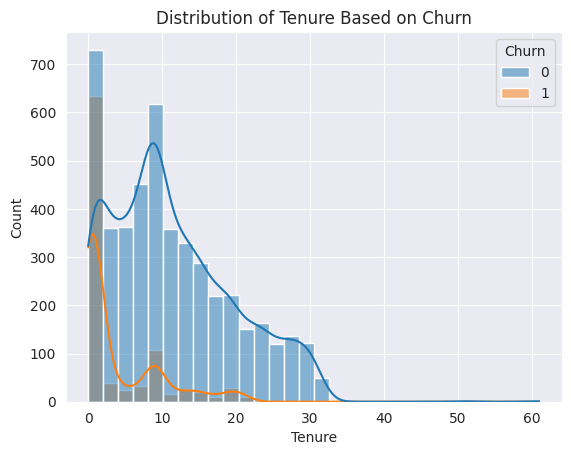

In [ ]:
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Tenure Based on Churn')

In [ ]:
# Does tenure correlate with churn?
# One-way ANOVA test between tenure and churn

from scipy.stats import f_oneway, mannwhitneyu

# Split the 'Tenure' variable by Churn group
tenure_not_churn = df[df['Churn'] == 0]['Tenure'].dropna()
tenure_churn = df[df['Churn'] == 1]['Tenure'].dropna()

# Perform One-Way ANOVA
# ANOVA assumptions: Normality (we checked earlier — data is not normally distributed) and homogeneity of variances.
# Since the data is not normal, ANOVA may not be the best method. Mann-Whitney U test is more appropriate.
# However, if we still want to use ANOVA (with caution in interpretation), the code is as follows:
stat_anova, pval_anova = f_oneway(tenure_not_churn, tenure_churn)

print("\nANOVA Test Result between Tenure and Churn:")
print("ANOVA F-statistic:", stat_anova)
print("ANOVA p-value:", pval_anova)

# Interpretation of ANOVA result
if pval_anova < 0.05:
    print("Reject H0 → There is a significant difference in the mean Tenure between churned and non-churned customers.")
else:
    print("Fail to reject H0 → There is no significant difference in the mean Tenure between churned and non-churned customers.")

# Since the data is not normally distributed, the Mann-Whitney U test is more suitable to compare the two groups
stat_mw, pval_mw = mannwhitneyu(tenure_not_churn, tenure_churn)

print("\nMann-Whitney U Test Result between Tenure and Churn:")
print("Mann-Whitney U statistic:", stat_mw)
print("Mann-Whitney U p-value:", pval_mw)

# Interpretation of Mann-Whitney U result
if pval_mw < 0.05:
    print("Reject H0 → There is a significant difference in the distribution (median) of Tenure between churned and non-churned customers.")
else:
    print("Fail to reject H0 → There is no significant difference in the distribution (median) of Tenure between churned and non-churned customers.")

# Conclusion from both tests (focus on Mann-Whitney U due to non-normality):
# There is a significant difference in tenure between customers who churn and those who do not.
# This is consistent with previous Chi-Square analysis that showed a relationship between tenure group and churn.
# Customers with shorter tenure tend to have a different (typically lower) tenure distribution compared to those who do not churn.



ANOVA Test Result between Tenure and Churn:
ANOVA F-statistic: 725.0743329492909
ANOVA p-value: 2.494913539751662e-150
Reject H0 → There is a significant difference in the mean Tenure between churned and non-churned customers.

Mann-Whitney U Test Result between Tenure and Churn:
Mann-Whitney U statistic: 3528152.0
Mann-Whitney U p-value: 1.3097213567891966e-181
Reject H0 → There is a significant difference in the distribution (median) of Tenure between churned and non-churned customers.


/tmp/ipython-input-48-2854041390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Tenure_Group', data=df, palette='viridis')


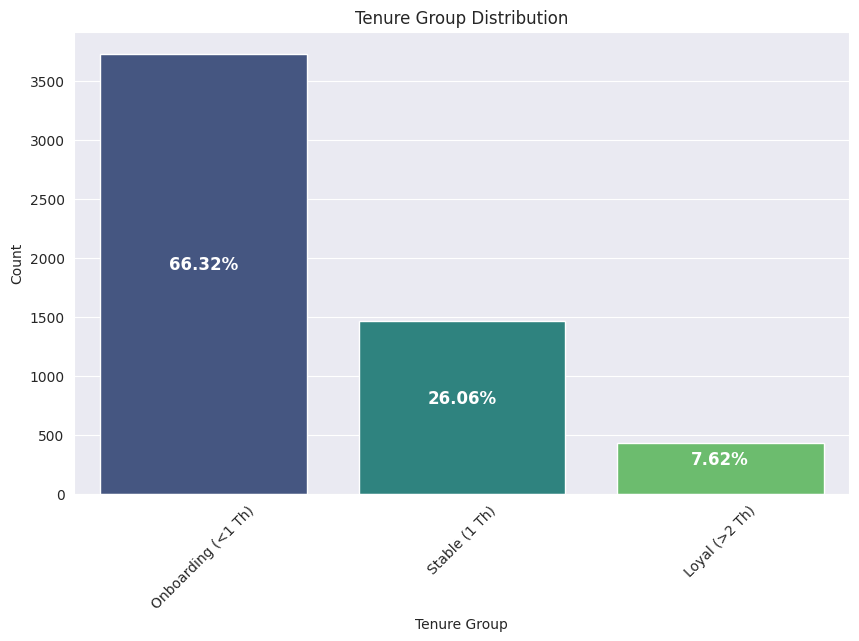

In [ ]:
bins = [0, 12, 24, df['Tenure'].max()]
labels = ['Onboarding (<1 Th)', 'Stable (1 Th)', 'Loyal (>2 Th)']

df['Tenure_Group'] = pd.cut(df['Tenure'], bins=bins, labels=labels, include_lowest=True)
df['Tenure_Group'].value_counts().sort_index()

# Visualisasi Tenure Group
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Tenure_Group', data=df, palette='viridis')

# Add percentage labels inside the bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2
    ax.text(x, y, percentage, ha='center', va='bottom', color='white', fontweight='bold', fontsize=12)

plt.title('Tenure Group Distribution')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

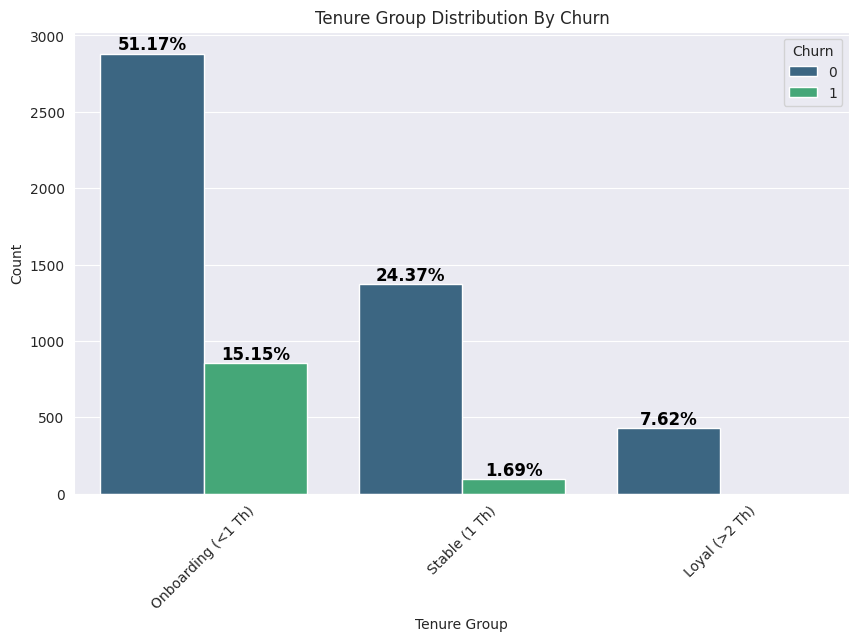

In [ ]:
# Churn by Tenure Group
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Tenure_Group', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())

    if count == 0:
      continue

    percentage = f'{100 * count / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', color='black', fontweight='bold', fontsize=12)

plt.title('Tenure Group Distribution By Churn')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

New customers are the most vulnerable to churn, while those who make it past the initial phase tend to be highly loyal. Retention efforts should primarily focus on the first one year after a customer starts transacting.

In [ ]:
from scipy.stats import chi2_contingency

# Is there a significant relationship between Tenure and Churn?
# Create a contingency table
contingency = pd.crosstab(df['Tenure_Group'], df['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequency Table:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Tenure Group and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Tenure Group and Churn.")


Chi-Square Statistic: 295.54092355276487
p-value: 6.669662561916946e-65
Degrees of Freedom: 2

Expected Frequency Table:
 [[3105.25541741  628.74458259]
 [1219.98117229  247.01882771]
 [ 356.7634103    72.2365897 ]]
Reject H0 → There is a significant relationship between Tenure Group and Churn.


**Insight:** New customers tend to churn more frequently. If not properly engaged within the first 3–6 months, the risk of losing them is very high. On the other hand, long-term customers rarely churn, the longer they stay, the more loyal and valuable they become.

#### The Number of Order vs Churn (OrderCount vs Churn)

In [ ]:
round(df['OrderCount'].describe(),2)

,OrderCount
count,5630.00
mean,2.96
std,2.88
min,1.00
25%,1.00
50%,2.00
75%,3.00
max,16.00


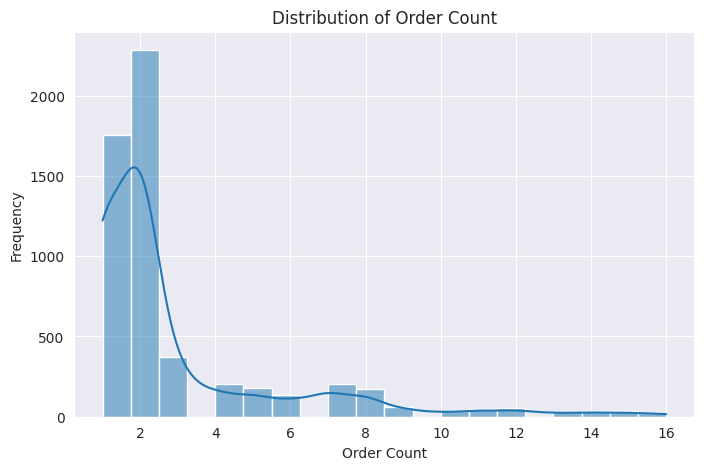

In [ ]:
# Distribution of OrderCount

plt.figure(figsize=(8, 5))
sns.histplot(df['OrderCount'], bins=20, kde=True)
plt.title('Distribution of Order Count')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()


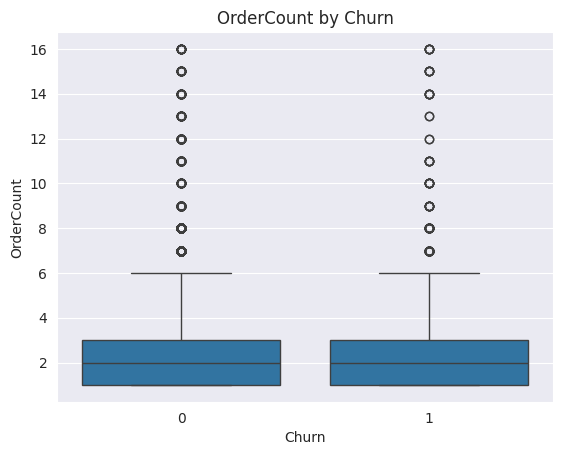

In [ ]:
sns.boxplot(x='Churn', y='OrderCount', data=df)
plt.title('OrderCount by Churn')
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

churn = df[df['Churn'] == 1]['OrderCount']
no_churn = df[df['Churn'] == 0]['OrderCount']

stat, p = mannwhitneyu(churn, no_churn, alternative='two-sided')
print("Mann–Whitney U Statistic:", stat)
print("p-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → Significant difference in order count between churn and non-churn customers.")
else:
    print("Fail to reject H0 → No significant difference in order count between the two groups.")


Mann–Whitney U Statistic: 2125452.0
p-value: 0.03050037481644772
Reject H0 → Significant difference in order count between churn and non-churn customers.


**Insight:** The Mann-Whitney U Test revealed a statistically significant difference in order counts between churned and non-churned customers. This indicates that churned customers tend to place fewer orders compared to those who remain active. Thus, lower order frequency may serve as a signal for potential churn, suggesting that businesses should focus on re-engaging low-frequency buyers to improve retention.

In [ ]:
# Binning of OrderCount into Frequency. # Frequency Bins by OrderCount

df['Frequency'] = pd.cut(df['OrderCount'], bins=bins, labels=labels, include_lowest=True)
bins = [0, 5, 10, df['OrderCount'].max()] # Define bins based on OrderCount values
labels = ['Low', 'Medium', 'High']

df['Frequency'] = pd.cut(df['OrderCount'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
## Mungkin perlu dihapus

df['Frequency'].value_counts().sort_index()

,count
Frequency,
Low,4790
Medium,613
High,227


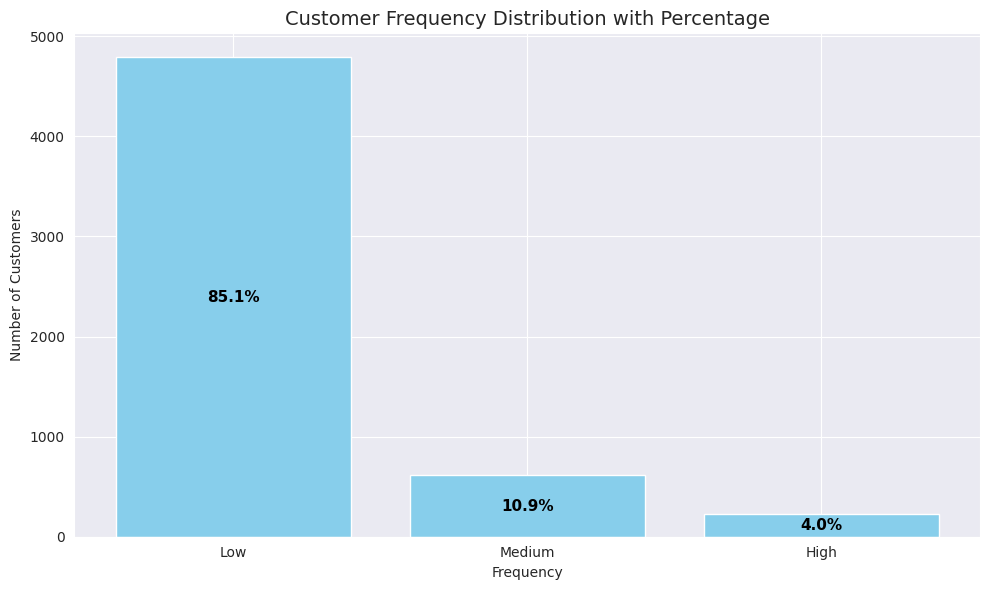

In [ ]:
import matplotlib.pyplot as plt

# Hitung frekuensi dan persentase
freq_counts = df['Frequency'].value_counts().sort_index()
percentages = (freq_counts / freq_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(freq_counts.index, freq_counts.values, color='skyblue')

# Tambahkan label persentase di dalam batang
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%',
             ha='center', va='center', fontsize=11, color='black', fontweight='bold')

# Styling
plt.title('Customer Frequency Distribution with Percentage', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Stats analysis between Frequency and Churn

contingency_freq = pd.crosstab(df['Frequency'], df['Churn'])

chi2, p, dof, expected = chi2_contingency(contingency_freq)

# Output hasil
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequency Table:\n", expected)

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Frequency Group and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Frequency Group and Churn.")


Chi-Square Statistic: 3.460539966200522
p-value: 0.17723655263587257
Degrees of Freedom: 2

Expected Frequency Table:
 [[3983.44227353  806.55772647]
 [ 509.78081705  103.21918295]
 [ 188.77690941   38.22309059]]
Fail to reject H0 → There is no significant relationship between Frequency Group and Churn.


#### Average Order Amount vs Churn (OrderAmountHikeFromlastYear vs Churn)

In [ ]:
round(df['OrderAmountHikeFromlastYear'].describe(), 2)

,OrderAmountHikeFromlastYear
count,5630.00
mean,15.67
std,3.59
min,11.00
25%,13.00
50%,15.00
75%,18.00
max,26.00


Average Order Amount Hike by Churn Category:
 Churn
0    15.69
1    15.62
Name: OrderAmountHikeFromlastYear, dtype: float64


/tmp/ipython-input-60-3303881851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_order_amount = df.groupby('Churn')['OrderAmountHikeFromlastYear'].mean().round(2)
/tmp/ipython-input-60-3303881851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_order_amount.index, y=avg_order_amount.values, palette='viridis')


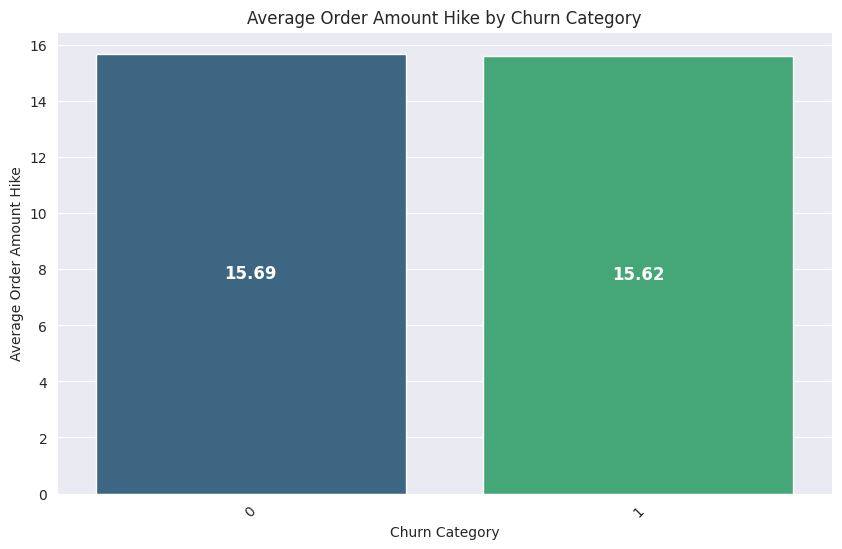

In [ ]:
# Calculate average Order Amount Hike based on Churn category
avg_order_amount = df.groupby('Churn')['OrderAmountHikeFromlastYear'].mean().round(2)
print("Average Order Amount Hike by Churn Category:\n", avg_order_amount)

# Visualize the average Order Amount Hike by Churn category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_order_amount.index, y=avg_order_amount.values, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.2f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=12)

plt.title('Average Order Amount Hike by Churn Category')
plt.xlabel('Churn Category')
plt.ylabel('Average Order Amount Hike')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Separate data based on churn status
churn_yes = df[df['Churn'] == 1]['OrderAmountHikeFromlastYear']
churn_no = df[df['Churn'] == 0]['OrderAmountHikeFromlastYear']

# Perform t-test (Welch’s t-test)
t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)

# Print results
print("T-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0 → The average Order Amount Hike differs significantly between churn and non-churn customers.")
else:
    print("Fail to reject H0 → There is no significant difference in the average Order Amount Hike.")


T-statistic: -0.5088204512705468
p-value: 0.6109640086528603
Fail to reject H0 → There is no significant difference in the average Order Amount Hike.


Overall, customers who churn do not show a statistically significant increase or decrease in order amount compared to those who do not churn. However, this analysis is based on raw numerical values. Without binning, we cannot clearly observe patterns among customers with low, medium, or high increases in order amounts. Therefore, binning this variable is necessary to better identify potential churn-related trends.

In [ ]:
df['OrderHike_Cat'] = pd.cut(df['OrderAmountHikeFromlastYear'],
                             bins=[10, 13, 15, 18, 26],
                             labels=['Low', 'Medium', 'High', 'Very High'],
                             include_lowest=True)

The variable `OrderAmountHikeFromlastYear`, which shows how much a customer's spending increased, was grouped into four categories (Low, Medium, High, Very High) based on quartiles. This binning allows us to test whether customers with lower or higher spending growth are more likely to churn using a Chi-Square Test. If a significant relationship is found, it suggests that order growth may predict churn and help guide retention strategies.

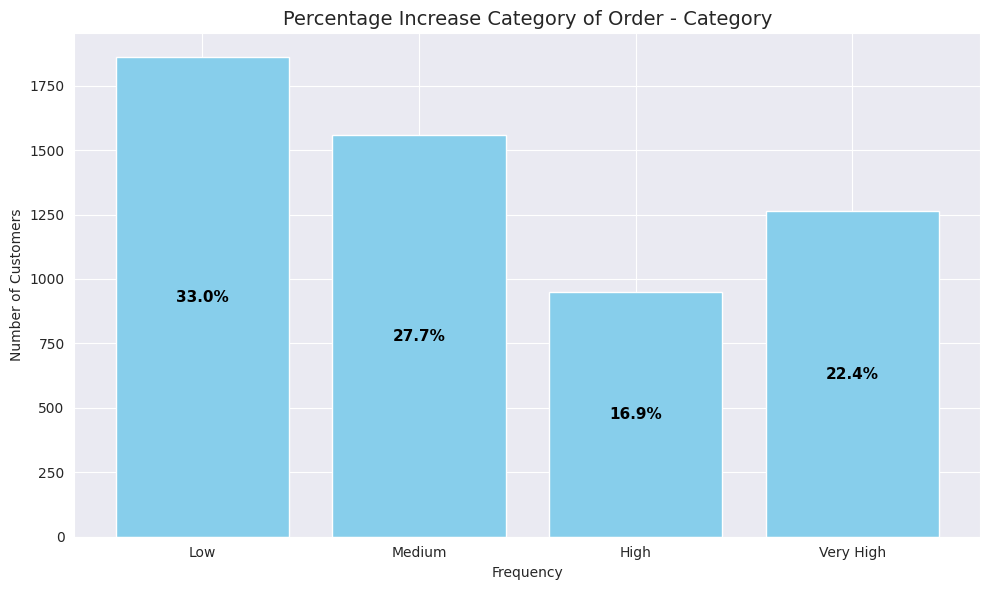

In [ ]:
import matplotlib.pyplot as plt

# Frequency and Percentage
freq_counts = df['OrderHike_Cat'].value_counts().sort_index()
percentages = (freq_counts / freq_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(freq_counts.index, freq_counts.values, color='skyblue')

# Tambahkan label persentase di dalam batang
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%',
             ha='center', va='center', fontsize=11, color='black', fontweight='bold')

# Styling
plt.title('Percentage Increase Category of Order - Category', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Create contingency table

orderhike_churn_ct = pd.crosstab(df['OrderHike_Cat'], df['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(orderhike_churn_ct)

# Output results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H₀ → There is a significant relationship between order amount hike and churn.")
else:
    print("Fail to reject H₀ → No significant relationship between order amount hike and churn.")


Chi-Square Statistic: 19.032210352582993
p-value: 0.0002692380979963348
Degrees of Freedom: 3

Expected Frequencies:
 [[1546.80639432  313.19360568]
 [1294.82664298  262.17335702]
 [ 790.86714032  160.13285968]
 [1049.49982238  212.50017762]]
Reject H₀ → There is a significant relationship between order amount hike and churn.


**Insight:** Customers who reduced their order amount or had no increase may be more likely to churn.

On the other hand, customers with a higher hike in order amount might be more engaged or satisfied.

**Business Recommendation**:

- Target users with stagnant or declining order amounts with personalized offers or re-engagement campaigns.

- Track this feature as a warning signal in churn prevention systems.

#### Warehouse to Home vs Churn (WareHouseToHome vs Churn)



In [ ]:
df['WarehouseToHome'].describe()

,WarehouseToHome
count,5630.000000
mean,15.566785
std,8.345961
min,5.000000
25%,9.000000
50%,14.000000
75%,20.000000
max,127.000000


In [ ]:
# Mann-Whitney U Test
churned = df[df['Churn'] == 1]['WarehouseToHome']
not_churned = df[df['Churn'] == 0]['WarehouseToHome']
mw_stat, mw_p = mannwhitneyu(churned, not_churned)

print("Mann-Whitney U Statistic:", mw_stat)
print("p-value:", mw_p)

# Interpretasi
alpha = 0.05
if mw_p < alpha:
    print("Reject H0 → There is a significant difference in distance between churn and non-churn customers.")
else:
    print("Fail to reject H0 → No significant difference in distance between churn and non-churn customers.")


Mann-Whitney U Statistic: 2492343.5
p-value: 2.040863948002307e-09
Reject H0 → There is a significant difference in distance between churn and non-churn customers.


In [ ]:
bins = [0, 9, 14, 20, df['WarehouseToHome'].max()]
labels = ['Very Close (≤9)', 'Close (10–14)', 'Far (15–20)', 'Very Far (>20)']
df['WarehouseToHome_Bin'] = pd.cut(df['WarehouseToHome'], bins=bins, labels=labels, include_lowest=True)


/tmp/ipython-input-68-3342394376.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='WarehouseToHome_Bin', data=df, palette='viridis')


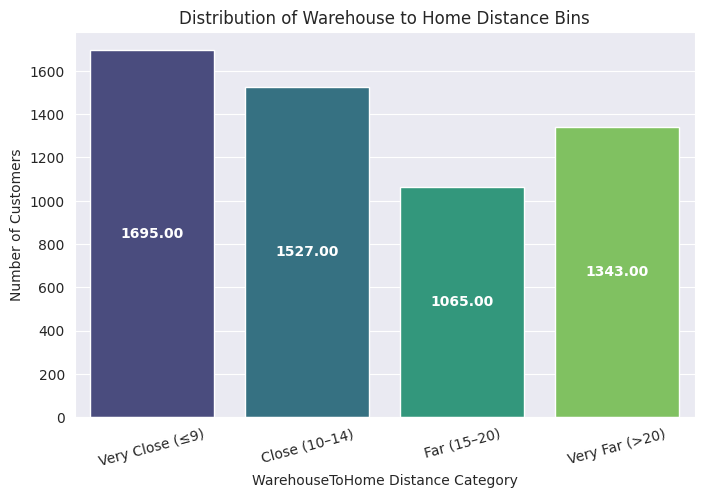

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binning
bins = [0, 9, 14, 20, df['WarehouseToHome'].max()]
labels = ['Very Close (≤9)', 'Close (10–14)', 'Far (15–20)', 'Very Far (>20)']
df['WarehouseToHome_Bin'] = pd.cut(df['WarehouseToHome'], bins=bins, labels=labels, include_lowest=True)

# Visualisaze customer distribution by WarehouseToHome bins
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='WarehouseToHome_Bin', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.2f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.title('Distribution of Warehouse to Home Distance Bins')
plt.xlabel('WarehouseToHome Distance Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.show()


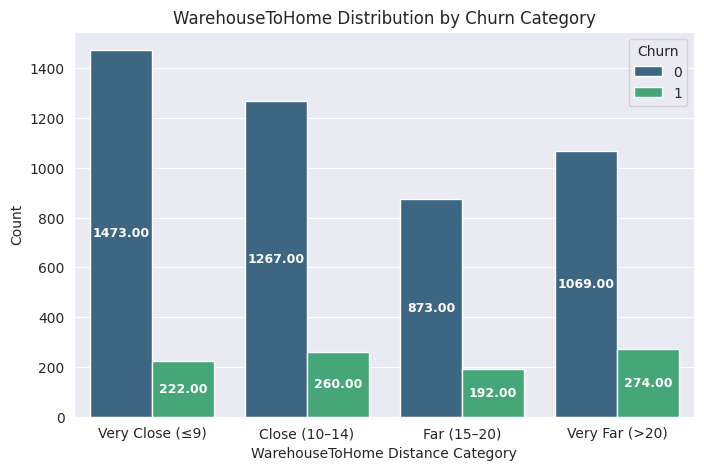

In [ ]:
# visualize Customer Churn by WarehouseToHome bins
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='WarehouseToHome_Bin', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()

    if value == 0:
      continue

    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.2f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('WarehouseToHome Distribution by Churn Category')
plt.xlabel('WarehouseToHome Distance Category')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
warehouse_churn_ct = pd.crosstab(df['WarehouseToHome_Bin'], df['Churn'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(warehouse_churn_ct)

# Output
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Warehouse Distance and Churn.")
else:
    print("Fail to reject H0 → No significant relationship between Warehouse Distance and Churn.")


Chi-Square Statistic: 30.23628118317913
p-value: 1.2308058982314574e-06
Degrees of Freedom: 3

Expected Frequencies:
 [[1409.58969805  285.41030195]
 [1269.87815275  257.12184725]
 [ 885.6714032   179.3285968 ]
 [1116.860746    226.139254  ]]
Reject H0 → There is a significant relationship between Warehouse Distance and Churn.


**Insight:**

Based on the results of the Chi-Square and Mann-Whitney U tests, there is a statistically significant relationship between the distance from the warehouse to the customer's home (WarehouseToHome) and customer churn behavior.

Customers who live farther from the warehouse tend to churn more easily.
Distance may affect customer experience in several ways—longer delivery times, higher shipping costs, or lower product quality upon arrival (especially for perishable goods).

**Business Recommendations:**

1. Optimize logistics for distant customers:

- Establish satellite warehouses or pickup points in areas with high concentrations of distant customers.

- Use express couriers or offer same-day delivery for remote areas.

2. Provide special incentives for customers with longer delivery distances:

- Offer free shipping, cashback vouchers, or loyalty rewards after a certain number of purchases.

3. Prioritize retention based on distance segmentation:

- Customers in the "Very Far" (>20) group should be considered high risk and targeted with retention strategies.

- Run targeted educational campaigns or personalized engagement efforts to retain them.

4. Monitor churn by geolocation:

- Conduct spatial analysis (e.g., by region or postal code) to identify high-churn areas and take location-specific action.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   category
 2   Tenure                       5630 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   object  
 4   CityTier                     5630 non-null   category
 5   WarehouseToHome              5630 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   object  
 7   Gender                       5630 non-null   object  
 8   HourSpendOnApp               5630 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   object  
 11  SatisfactionScore            5630 non-null   category
 12  MaritalStatus                5630 non-null   object  
 13  Num

#### Day Since Last Order vs Churn

In [ ]:
df['DaySinceLastOrder'].value_counts()

,count
DaySinceLastOrder,
3.0,1207
2.0,792
1.0,614
8.0,538
0.0,496
7.0,447
4.0,431
9.0,299
5.0,228


| Bin Label       | Rentang Hari | Rasional Bisnis                                 |
| --------------- | ------------ | ----------------------------------------------- |
| **Very Recent** | 0–3 hari     | Customers just shopped, still very active |
| **Recent**      | 4–7 hari     | Still relatively active |
| **Moderate**    | 8–15 hari    | Need to start monitoring, activity starts to decline |
| **Inactive**    | >15 hari     | Small amount but early indication of potential churn   |


In [ ]:
def bin_day_last_order_v2(days):
    if days <= 7:
        return 'Very Recent'
    elif days <= 14:
        return 'Recent'
    elif days <= 21:
        return 'Moderate'
    else:
        return 'Inactive'

df['RecencyGroup'] = df['DaySinceLastOrder'].apply(bin_day_last_order_v2)
df['RecencyGroup'].value_counts().sort_index()


,count
RecencyGroup,
Inactive,3
Moderate,59
Recent,1240
Very Recent,4328


In [ ]:
# Recency bins
bins = [0, 7, 14, df['DaySinceLastOrder'].max()]
labels = ['High', 'Medium', 'Low']

df['Recency'] = pd.cut(df['DaySinceLastOrder'], bins=bins, labels=labels, include_lowest=True)

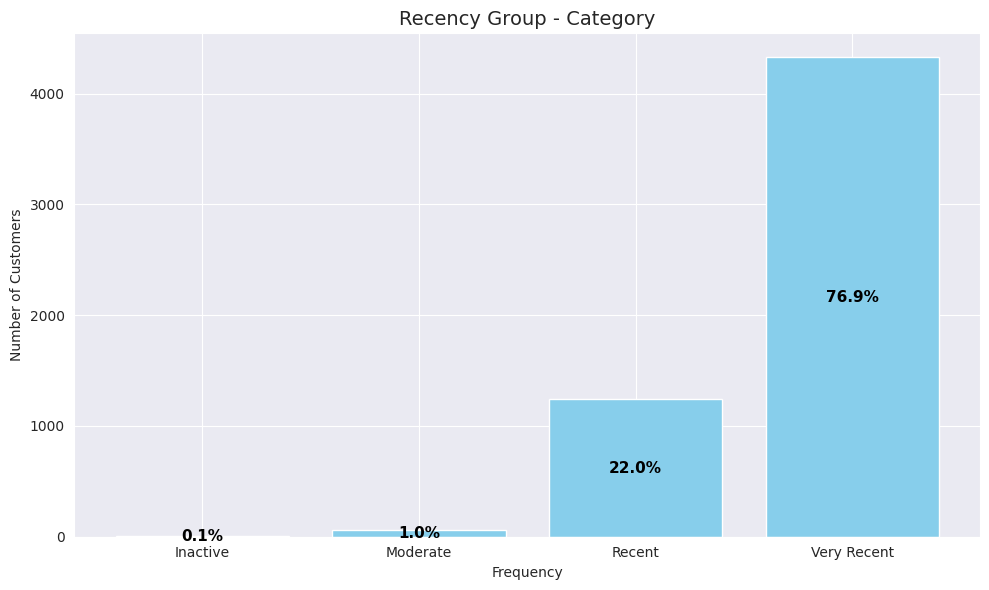

In [ ]:
import matplotlib.pyplot as plt

# Frequency and Percentage
freq_counts = df['RecencyGroup'].value_counts().sort_index()
percentages = (freq_counts / freq_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(freq_counts.index, freq_counts.values, color='skyblue')

# Tambahkan label persentase di dalam batang
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%',
             ha='center', va='center', fontsize=11, color='black', fontweight='bold')

# Styling
plt.title('Recency Group - Category', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

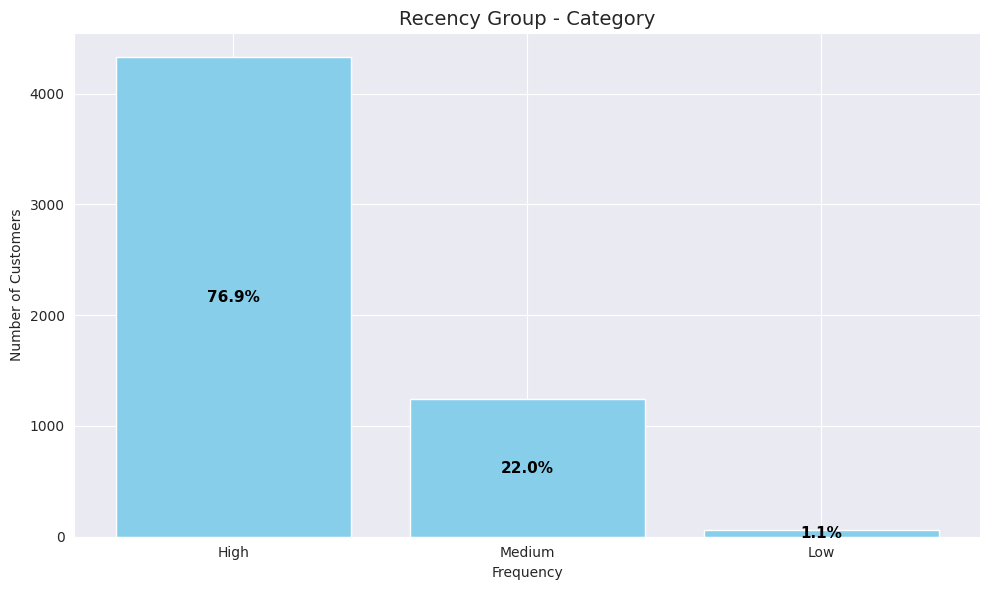

In [ ]:
import matplotlib.pyplot as plt

# Frequency and Percentage
freq_counts = df['Recency'].value_counts().sort_index()
percentages = (freq_counts / freq_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(freq_counts.index, freq_counts.values, color='skyblue')

# Tambahkan label persentase di dalam batang
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%',
             ha='center', va='center', fontsize=11, color='black', fontweight='bold')

# Styling
plt.title('Recency Group - Category', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

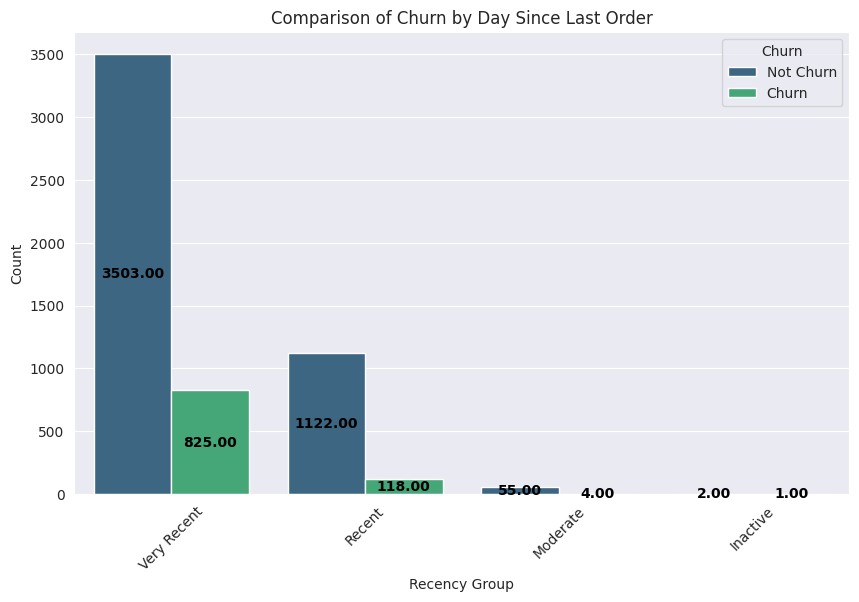

In [ ]:
# Visualize Customer Churn by DaySinceLastOrder
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='RecencyGroup', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()

    if value == 0:
      continue

    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.2f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='black', fontweight='bold', fontsize=10)

plt.title('Comparison of Churn by Day Since Last Order')
plt.xlabel('Recency Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# chi square to see the relationship between recency group and churn
recency_churn = pd.crosstab(df['RecencyGroup'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(recency_churn)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Recency Group and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Recency Group and Churn.")

Chi-Square Statistic: 67.60452849909143
p-value: 1.390203379561202e-14
Reject H0 → There is a significant relationship between Recency Group and Churn.


**Insight**: Customers who haven't made a purchase recently (low recency) are more likely to churn, while customers with recent activity (high recency) tend to stay.

Recency is a strong indicator of churn risk. Customers become increasingly likely to churn the longer they go without placing an order.

**Recommendation**:

- Trigger retention campaigns for customers in the "Low Recency" group, such as special discounts or reminders.

- Monitor recency in real-time to identify and engage at-risk customers early.

- Segment customers by recency to tailor communication frequency and tone.

#### The Use of Coupon vs Churn (CouponUsed vs Churn)



In [ ]:
round(df['CouponUsed'].describe(),2)

,CouponUsed
count,5630.00
mean,1.72
std,1.86
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,16.00


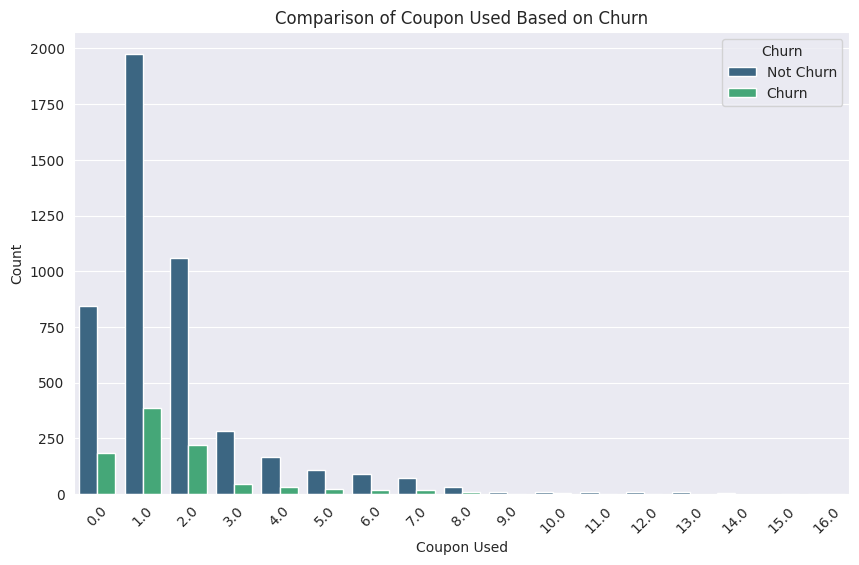

In [ ]:
# The relation between coupon used and churn

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CouponUsed', hue='Churn', data=df, palette='viridis')
plt.title('Comparison of Coupon Used Based on Churn')
plt.xlabel('Coupon Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Pisahkan data berdasarkan churn (pastikan tanpa NaN)
coupon_churn = df[df['Churn'] == 1]['CouponUsed']
coupon_no_churn = df[df['Churn'] == 0]['CouponUsed']

# Lakukan uji Mann-Whitney U
stat, p = mannwhitneyu(coupon_churn, coupon_no_churn, alternative='two-sided')

# Output hasil
print("U-statistic:", stat)
print("p-value:", p)

# Interpretasi
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant difference in coupon usage between churned and non-churned customers.")
else:
    print("Fail to reject H0 → No significant difference in coupon usage between churned and non-churned customers.")


U-statistic: 2192814.5
p-value: 0.5430023781861197
Fail to reject H0 → No significant difference in coupon usage between churned and non-churned customers.


Overall, customers who churn do not show a statistically significant difference in the number of coupons used compared to those who do not churn. Even after binning, there is no significant relation between the use of coupon and churn.

**Insight**:

This suggests that the number of coupons used is not a reliable predictor of churn. Customers who leave the platform do not necessarily use fewer or more coupons than those who stay.

**Recommendation**:

Rather than focusing retention strategies on coupon usage alone, businesses should prioritize other behavioral indicators (e.g., order frequency, recency, or satisfaction) that show stronger associations with churn risk.

#### Number of Customer's Address vs Churn (NumberOfAddress vs Churn)

In [ ]:
df['NumberOfAddress'].value_counts()

,count
NumberOfAddress,
2,1369
3,1278
4,588
5,571
6,382
1,371
8,280
7,256
9,239


In [ ]:
round(df['NumberOfAddress'].describe(), 2)

,NumberOfAddress
count,5630.00
mean,4.21
std,2.58
min,1.00
25%,2.00
50%,3.00
75%,6.00
max,22.00


In [ ]:
# Address bins
bins = [0, 3, 6, df['DaySinceLastOrder'].max()]
labels = ['Few Addresses (<= 3)', 'Medium Addresses (4-6)', 'Many Addresses (7 =<)']

df['NumberAddress'] = pd.cut(df['NumberOfAddress'], bins=bins, labels=labels, include_lowest=True)

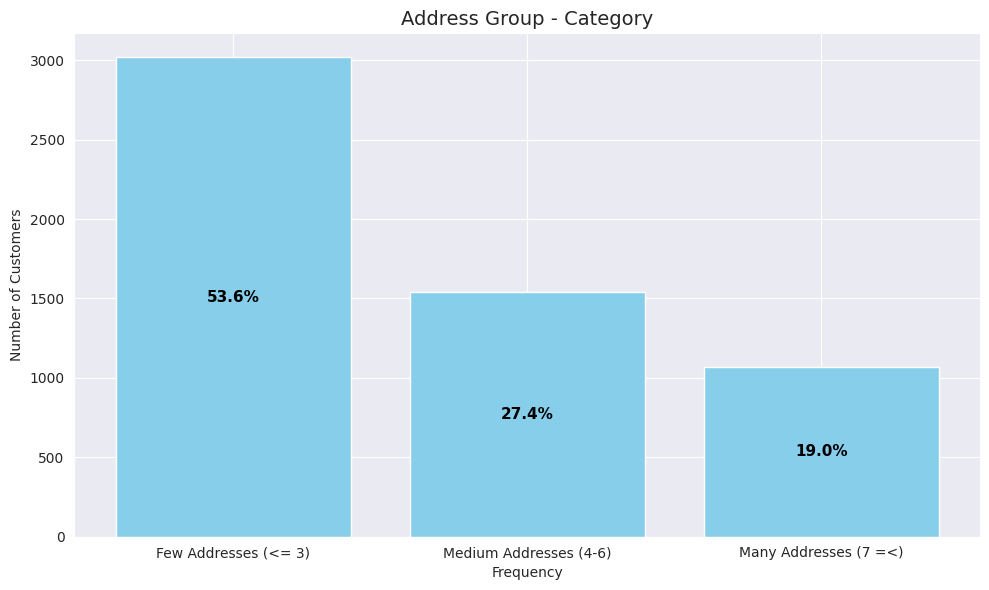

In [ ]:
import matplotlib.pyplot as plt

# Frequency and Percentage
freq_counts = df['NumberAddress'].value_counts().sort_index()
percentages = (freq_counts / freq_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(freq_counts.index, freq_counts.values, color='skyblue')

# Tambahkan label persentase di dalam batang
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{pct:.1f}%',
             ha='center', va='center', fontsize=11, color='black', fontweight='bold')

# Styling
plt.title('Address Group - Category', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

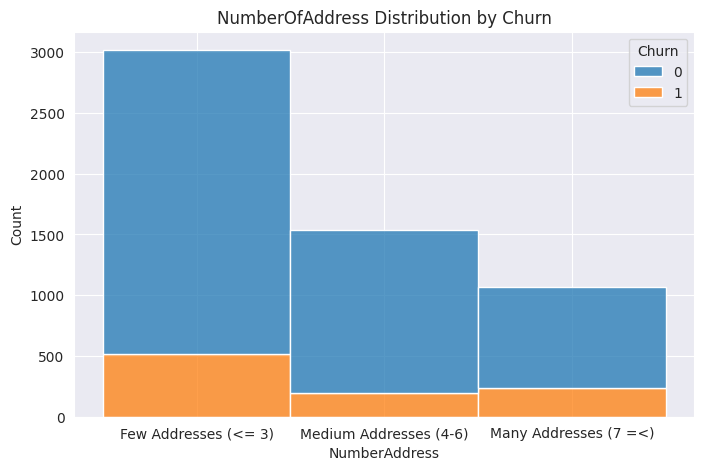

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(data=df, x="NumberAddress", hue="Churn", multiple="stack", bins=20, ax=axes)
axes.set_title("NumberOfAddress Distribution by Churn")

plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

addr_churn = df[df['Churn'] == 1]['NumberOfAddress']
addr_no_churn = df[df['Churn'] == 0]['NumberOfAddress']

# Testing Mann-Whitney U
stat, p = mannwhitneyu(addr_churn, addr_no_churn, alternative='two-sided')

# Output
print("U-statistic:", stat)
print("p-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant difference in the number of addresses between churned and non-churned customers.")
else:
    print("Fail to reject H0 → No significant difference in the number of addresses between churned and non-churned customers.")


U-statistic: 2316556.5
p-value: 0.03049724563723119
Reject H0 → There is a significant difference in the number of addresses between churned and non-churned customers.


In [ ]:
# Stats analysis between the address group and churn

contingency_freq = pd.crosstab(df['NumberAddress'], df['Churn'])

chi2, p, dof, expected = chi2_contingency(contingency_freq)

# Output hasil
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequency Table:\n", expected)

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Address Group and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Address Group and Churn.")


Chi-Square Statistic: 38.25408005330556
p-value: 4.934373972819957e-09
Degrees of Freedom: 2

Expected Frequency Table:
 [[2509.81811723  508.18188277]
 [1281.52078153  259.47921847]
 [ 890.66110124  180.33889876]]
Reject H0 → There is a significant relationship between Address Group and Churn.


**Interpretation:** Customers who add multiple addresses may be more engaged, use the platform for diverse purposes (home, work, gifting), or have stronger intent to continue using the service.

Conversely, customers with only one or two addresses might be casual or one-time users, making them more prone to churn.

**Recommendation**:

Encourage users to add more delivery addresses—such as for work, family, or friends—by offering small incentives (e.g., discount for adding a second address). This may help increase platform engagement and reduce churn risk.

#### The Amount of Cashback vs Churn (CashbackAmount vs Churn)

In [ ]:
round(df['CashbackAmount'].describe(),2)

,CashbackAmount
count,5630.00
mean,177.22
std,49.21
min,0.00
25%,145.77
50%,163.28
75%,196.39
max,324.99


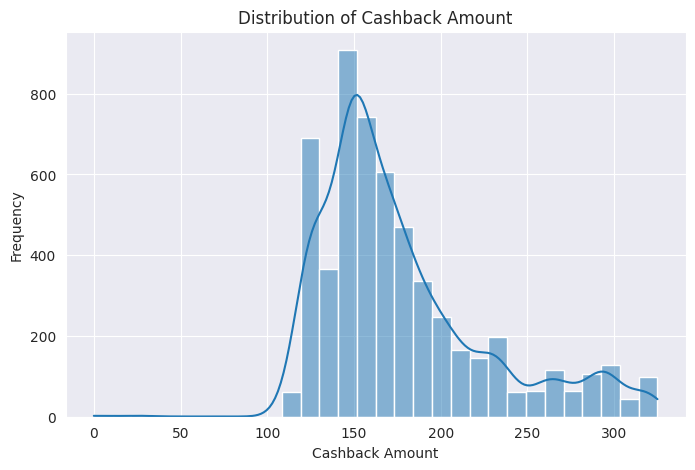

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CashbackAmount'], bins=30, kde=True)
plt.title('Distribution of Cashback Amount')
plt.xlabel('Cashback Amount')
plt.ylabel('Frequency')
plt.show()

To investigate whether cashback amount influences customer churn, we binned the continuous CashbackAmount variable into three categories: Low, Medium, and High. Then, we performed a Chi-Square Test to examine the association between Cashback_Cat and Churn.

In [ ]:
df['Cashback_Cat'] = pd.cut(df['CashbackAmount'],
                            bins=[0, 145.77, 163.28, 196.39, df['CashbackAmount'].max()],
                            labels=['Low', 'Medium', 'High', 'Very High'],
                            include_lowest=True)


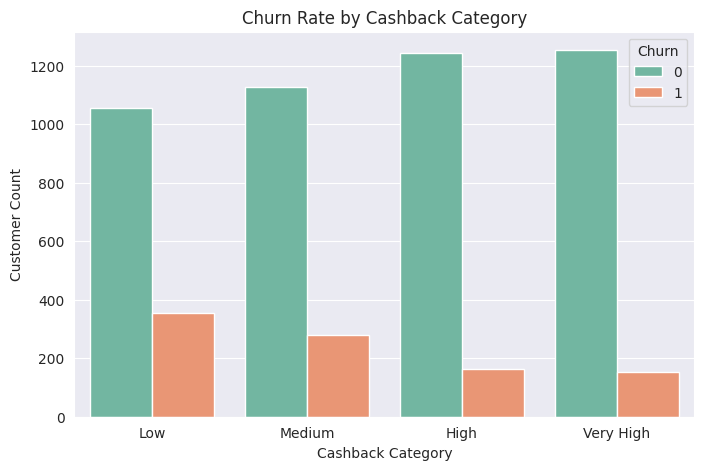

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cashback_Cat', hue='Churn', data=df, palette='Set2')
plt.title('Churn Rate by Cashback Category')
plt.xlabel('Cashback Category')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
table = pd.crosstab(df['Cashback_Cat'], df['Churn'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(table)

# Output
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("\nExpected Frequency Table:\n", expected)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("\nReject H0 → There is a significant relationship between Cashback Amount Category and Churn.")
else:
    print("\nFail to reject H0 → There is no significant relationship between Cashback Amount Category and Churn.")


Chi-Square Statistic: 141.22234417727955
p-value: 2.060120423710717e-30
Degrees of Freedom: 3

Expected Frequency Table:
 [[1171.74742451  237.25257549]
 [1169.25257549  236.74742451]
 [1170.08419183  236.91580817]
 [1170.91580817  237.08419183]]

Reject H0 → There is a significant relationship between Cashback Amount Category and Churn.


**Business Insight:** Customers receiving different levels of cashback show different churn tendencies. This suggests that cashback incentives might influence customer retention and should be strategically adjusted to reduce churn.

#### Hour Spend vs Churn (HourSpendOnApp vs Churn)

In [ ]:
df['HourSpendOnApp'].value_counts()

,count
HourSpendOnApp,
3.0,2942
2.0,1471
4.0,1176
1.0,35
0.0,3
5.0,3


**Note:** The variable HourSpendOnApp can be viewed both as numerical and categorical. As a numerical variable, it reflects the actual time customers spend on the app, allowing us to use the Mann-Whitney U test to compare distributions between churned and non-churned users. However, it can also be grouped into categories (e.g., low, medium, high usage), making it suitable for Chi-Square analysis. Using both approaches helps us understand not only the difference in average usage but also how usage levels are associated with churn behavior.

--- Dijelaskan alasan nggak menghapus 0 jam ---

In [ ]:
from scipy.stats import chi2_contingency, mannwhitneyu
import pandas as pd

# Chi-Square Test
contingency_table = pd.crosstab(df['HourSpendOnApp'], df['Churn'])
chi2_stat, chi2_p, chi2_dof, chi2_expected = chi2_contingency(contingency_table)

# Mann-Whitney U Test
churned = df[df['Churn'] == 1]['HourSpendOnApp']
not_churned = df[df['Churn'] == 0]['HourSpendOnApp']
mw_stat, mw_p = mannwhitneyu(churned, not_churned)

# Output Results
print("=== Chi-Square Test ===")
print("Statistic:", chi2_stat)
print("p-value:", chi2_p)
if chi2_p < 0.05:
    print("Reject H0 → There is a significant relationship between HourSpendOnApp and Churn (categorical).")
else:
    print("Fail to reject H0 → No significant relationship between HourSpendOnApp and Churn (categorical).")

print("\n=== Mann-Whitney U Test ===")
print("Statistic:", mw_stat)
print("p-value:", mw_p)
if mw_p < 0.05:
    print("Reject H0 → There is a significant difference in app usage time between churned and non-churned customers.")
else:
    print("Fail to reject H0 → No significant difference in app usage time between churned and non-churned customers.")


=== Chi-Square Test ===
Statistic: 10.73853464775109
p-value: 0.05681772218667573
Fail to reject H0 → No significant relationship between HourSpendOnApp and Churn (categorical).

=== Mann-Whitney U Test ===
Statistic: 2271462.0
p-value: 0.20945943456720229
Fail to reject H0 → No significant difference in app usage time between churned and non-churned customers.


**Insgiht:** App usage time alone is not a strong predictor of churn.
Retention strategies should consider other variables—such as satisfaction score, order count, or customer complaints—that may better explain or influence churn behavior.

## Categorical Data

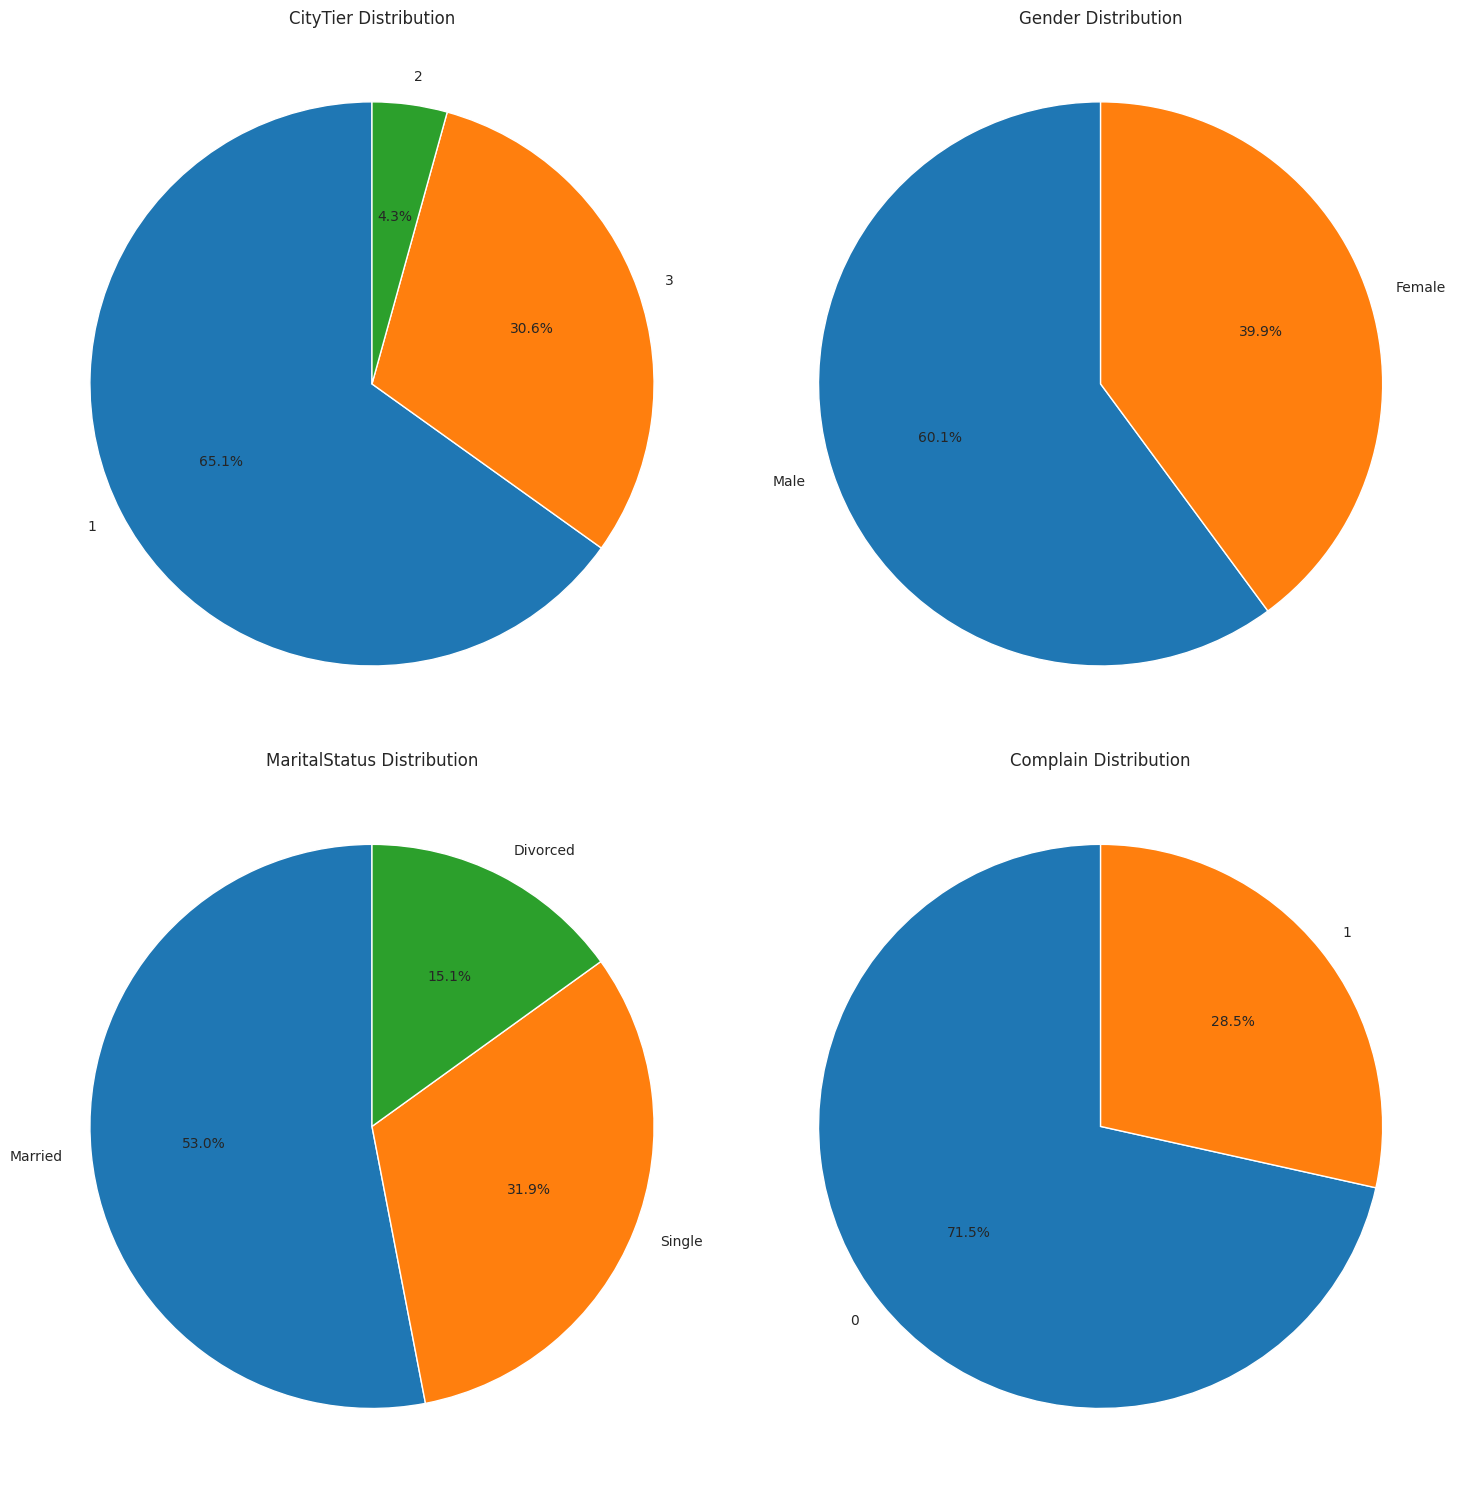

In [ ]:
cat_vars = ['CityTier', 'Gender', 'MaritalStatus', 'Complain', 'PreferredLoginDevice', 'PreferedOrderCat', 'NumberOfDeviceRegistered']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

/tmp/ipython-input-97-2108062671.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-97-2108062671.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-97-2108062671.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-97-2108062671.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/tmp/ipython-input-97-2108062671.py:15: UserWarning: set_ticklabels() sh

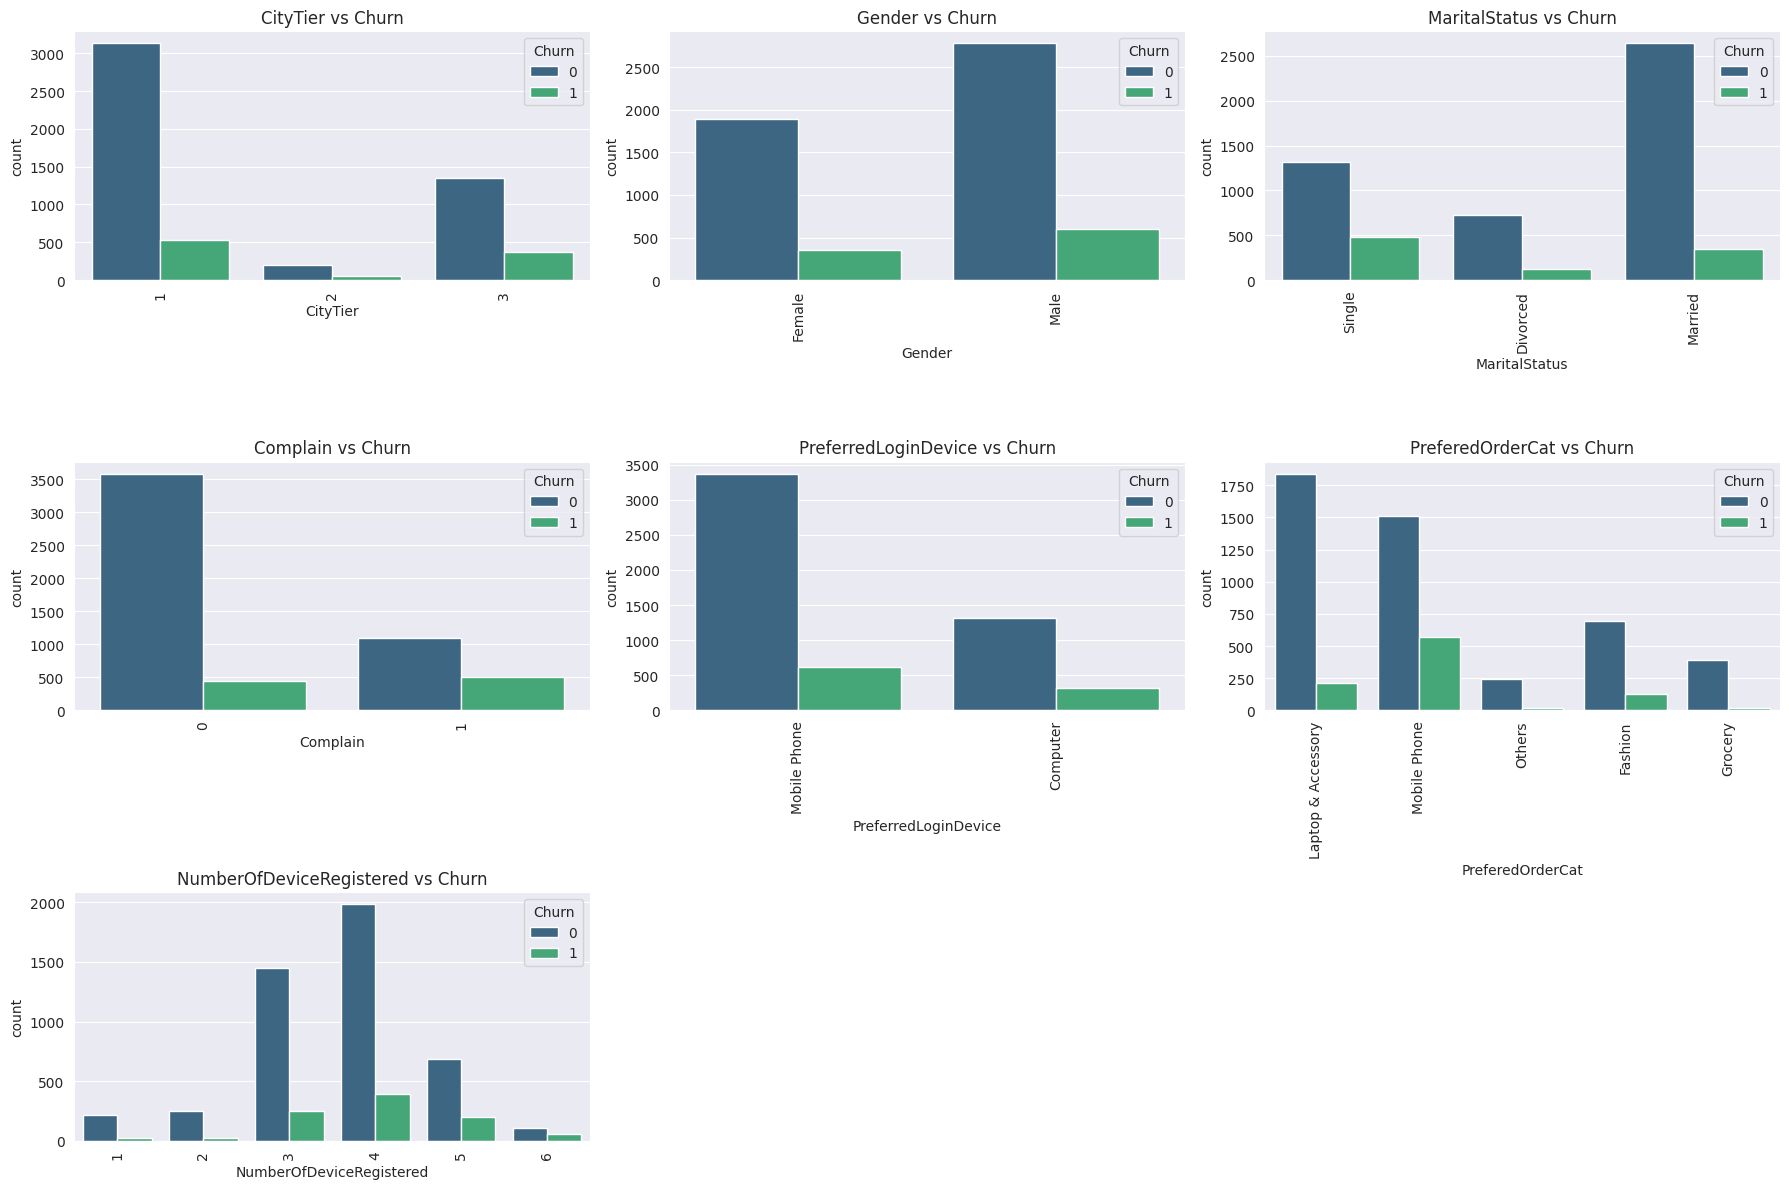

In [ ]:
cat_vars = ['CityTier', 'Gender', 'MaritalStatus', 'Complain', 'PreferredLoginDevice', 'PreferedOrderCat', 'NumberOfDeviceRegistered']

# Calculate rows and columns dynamically
n_vars = len(cat_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axs = axs.flatten()

# Plot each variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i], palette='viridis')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(f'{var} vs Churn')

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
fig.tight_layout()
plt.show()

#### City Tier vs Churn (CityTier vs Churn)

In [ ]:
city_tier_churn = df.groupby(['CityTier', 'Churn']).size().unstack().fillna(0)
city_tier_churn_percentage = city_tier_churn.div(city_tier_churn.sum(axis=1), axis=0) * 100
city_tier_churn_percentage = city_tier_churn_percentage.round(2)
print("Percentage of City Tier Based on Churn:\n", city_tier_churn_percentage)

Percentage of City Tier Based on Churn:
 Churn         0      1
CityTier              
1         85.49  14.51
2         80.17  19.83
3         78.63  21.37


/tmp/ipython-input-98-838696079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_tier_churn = df.groupby(['CityTier', 'Churn']).size().unstack().fillna(0)


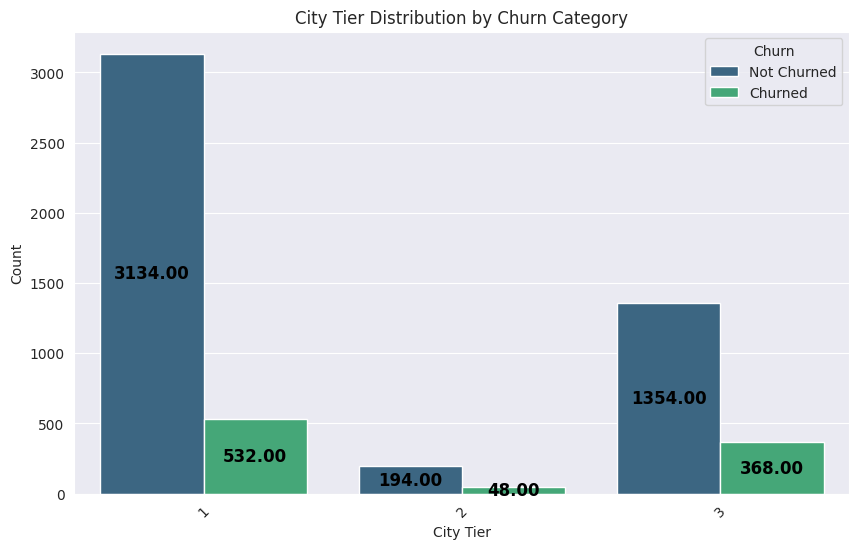

In [ ]:
# Churn Visualization Based on City Tier

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CityTier', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()

    if value == 0:
      continue

    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.2f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='black', fontweight='bold', fontsize=12)

plt.title('City Tier Distribution by Churn Category')
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

In [ ]:
# Chi-Square Analysis to Investigate the Relationship between City Tier and Churn

citytier_churn = pd.crosstab(df['CityTier'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(citytier_churn)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between City Tier and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between City Tier and Churn.")


Chi-Square Statistic: 40.982404247736355
p-value: 1.2612000812079956e-09
Reject H0 → There is a significant relationship between City Tier and Churn.


**Insight**: City tier plays an important role in customer retention.
Customers from different city tiers exhibit different churn tendencies, suggesting that location-based factors (e.g., infrastructure, digital accessibility, service quality) may influence customer loyalty.
Businesses should consider tailoring their retention strategies based on the customer's city tier for more effective churn prevention.

In [ ]:
percentage_by_city = df['CityTier'].value_counts(normalize=True) * 100
print(f"Persentase CityTier 2: {percentage_by_city[2]:.2f}%")

Persentase CityTier 2: 4.30%


In [ ]:
percentage_by_city = df['CityTier'].value_counts(normalize=True) * 100
combined_percentage = percentage_by_city[1] + percentage_by_city[3]
print(f"Persentase gabungan CityTier 2 dan 3: {combined_percentage:.2f}%")

Persentase gabungan CityTier 2 dan 3: 95.70%


**Business Recommendation:** Implementing targeted marketing initiatives and tailored offers to increase customer engagement and conversion in CityTier 2 areas.

#### The Number of Customer's Device vs Churn (NumberOfDevicRegistered vs Churn)

In [ ]:
round(df['NumberOfDeviceRegistered'].describe(),2)

,NumberOfDeviceRegistered
count,5630.00
mean,3.69
std,1.02
min,1.00
25%,3.00
50%,4.00
75%,4.00
max,6.00


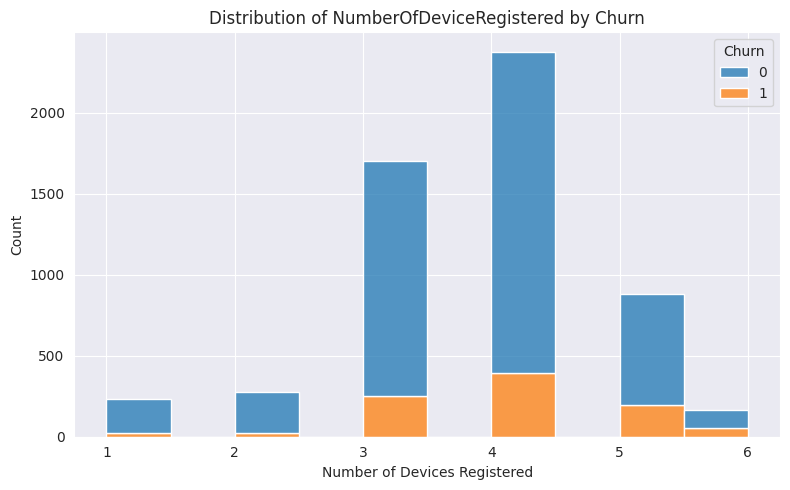

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot histogram
sns.histplot(data=df, x="NumberOfDeviceRegistered", hue="Churn", multiple="stack", bins=10)
plt.title("Distribution of NumberOfDeviceRegistered by Churn")
plt.xlabel("Number of Devices Registered")
plt.ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Split the data by churn (make sure there are no NaNs)
device_churn = df[df['Churn'] == 1]['NumberOfDeviceRegistered']
device_no_churn = df[df['Churn'] == 0]['NumberOfDeviceRegistered']

# Perform Mann-Whitney U test
stat, p = mannwhitneyu(device_churn, device_no_churn, alternative='two-sided')

# Output results
print("U-statistic:", stat)
print("p-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant difference in the number of devices registered between churned and non-churned customers.")
else:
    print("Fail to reject H0 → No significant difference in the number of devices registered between churned and non-churned customers.")


U-statistic: 2546899.0
p-value: 3.0541891238508676e-14
Reject H0 → There is a significant difference in the number of devices registered between churned and non-churned customers.


**Interpretation:** Customers who registered more devices are significantly less likely to churn.

This may indicate that customers with more registered devices are more engaged with the platform (e.g., using it on multiple phones, tablets, etc.).

Also, they may rely on the service more regularly and across various contexts, increasing their retention likelihood.

#### Satisfaction Score vs Churn (SatisfactioScore vs Churn)

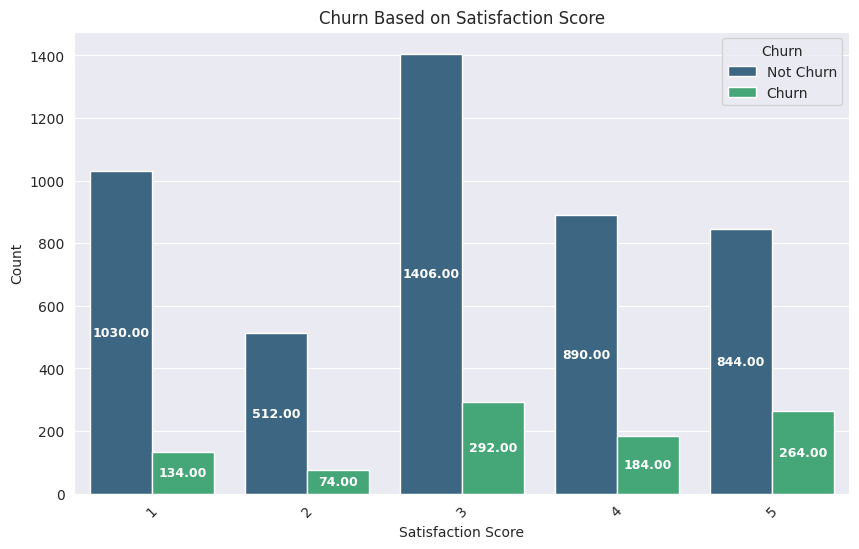

In [ ]:
# The relation between satisfaction score vs churn

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SatisfactionScore', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()

    if value == 0:
      continue

    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.2f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Churn Based on Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# Chi-Square test to examine the relationship between Satisfaction Score and Churn
satisfaction_churn = pd.crosstab(df['SatisfactionScore'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(satisfaction_churn)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Satisfaction Score and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Satisfaction Score and Churn.")


Chi-Square Statistic: 69.8653884066938
p-value: 2.4233349782737515e-14
Reject H0 → There is a significant relationship between Satisfaction Score and Churn.


Satisfaction_Category
unsatisfied    3448
satisfied      2182
Name: count, dtype: int64


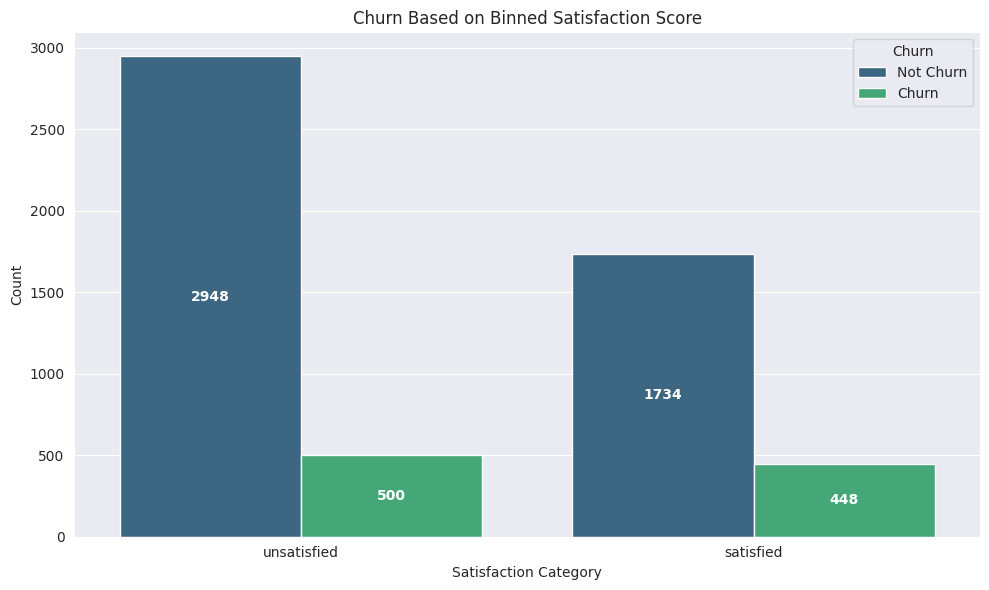

In [ ]:
# Binning satisfaction score
df['Satisfaction_Category'] = df['SatisfactionScore'].apply(lambda x: 'satisfied' if x >= 4 else 'unsatisfied')

# Check the counts of the new binned column
print(df['Satisfaction_Category'].value_counts())

# Visualize churn based on the binned satisfaction score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Satisfaction_Category', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
        continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'  # or use f'{(value/df.shape[0])*100:.1f}%' for percentage of total
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.title('Churn Based on Binned Satisfaction Score')
plt.xlabel('Satisfaction Category')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.tight_layout()
plt.show()


Insight: Customer satisfaction is a critical factor in churn behavior.
Customers with lower satisfaction scores are much more likely to churn, highlighting the importance of consistently monitoring and improving customer satisfaction to increase retention.

Companies should prioritize strategies such as: (1) Personalized support; (2) Faster resolution times; (3) Loyalty programs to enhance satisfaction and reduce churn risk.

#### Payment Methods vs Churn (PreferredPaymentMode vs Churn)

In [ ]:
# Percentage of Payment Methods Based on Churn

payment_mode_churn = df.groupby(['PreferredPaymentMode', 'Churn']).size().unstack().fillna(0)
payment_mode_churn_percentage = payment_mode_churn.div(payment_mode_churn.sum(axis=1), axis=0) * 100
payment_mode_churn_percentage = payment_mode_churn_percentage.round(2)
print("Percentage of Payment Methods Based on Churn:\n", payment_mode_churn_percentage)

Percentage of Payment Methods Based on Churn:
 Churn                     0      1
PreferredPaymentMode              
Cash on Delivery      75.10  24.90
Credit Card           85.79  14.21
Debit Card            84.62  15.38
E wallet              77.20  22.80
UPI                   82.61  17.39


/tmp/ipython-input-107-3598041649.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_mode_churn = df.groupby(['PreferredPaymentMode', 'Churn']).size().unstack().fillna(0)


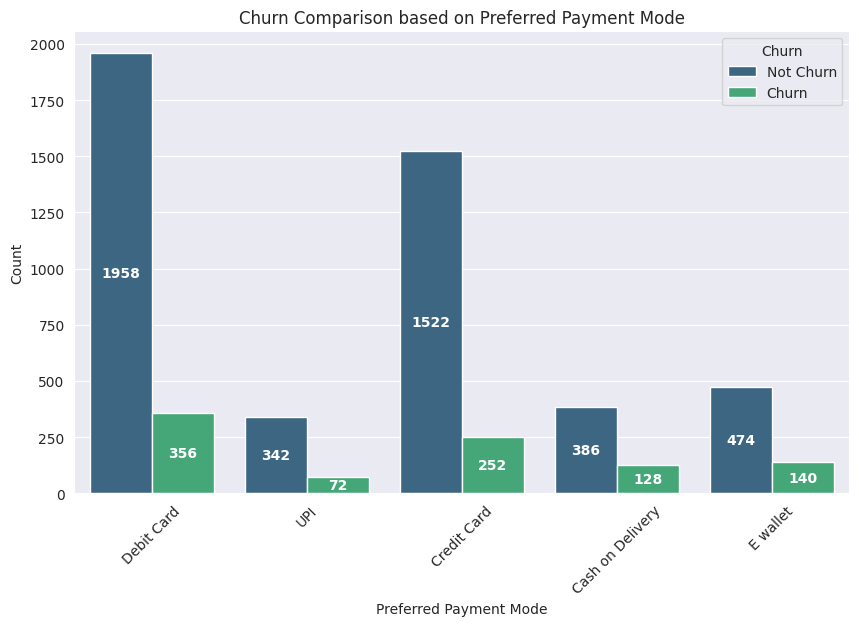

In [ ]:
# Preferred Payment Mode Visualization Based on Churn

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PreferredPaymentMode', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value ==0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.title('Churn Comparison based on Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# Chi-Square Analysis to Investigate the Relationship between Payment Mode and Churn

payment_churn = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(payment_churn)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between PreferredPaymentMode and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between PreferredPaymentMode and Churn.")


Chi-Square Statistic: 51.82895974579939
p-value: 1.4978570960706217e-10
Reject H0 → There is a significant relationship between PreferredPaymentMode and Churn.


There is a statistically significant relationship between payment method and customer churn behavior. Users who opted for Cash on Delivery and E-Wallets exhibited the highest churn rates, indicating that these segments may be more vulnerable to switching to other platforms. Alternatively, it is also possible that these customers did not switch platforms but simply changed their payment methods. Credit card users demonstrated the highest level of loyalty, with the lowest churn rate observed.

#### Gender vs Churn

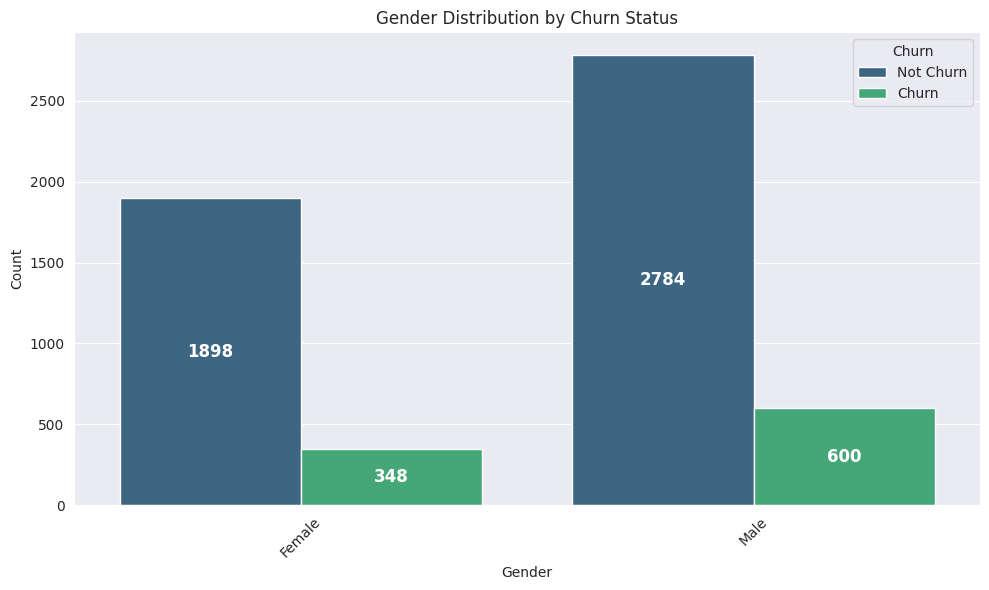

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=12)

# Customize plot
plt.title('Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.tight_layout()
plt.show()


In [ ]:
# Chi-Square test to examine the relationship between Gender and Churn
gender_churn = pd.crosstab(df['Gender'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(gender_churn)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Gender and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Gender and Churn.")


Chi-Square Statistic: 4.662908495367532
p-value: 0.030820940334890086
Reject H0 → There is a significant relationship between Gender and Churn.


In [ ]:
percentage_by_gender = df['Gender'].value_counts(normalize=True) * 100
combined_percentage = percentage_by_gender['Female']
print(f"{combined_percentage:.2f}%")

39.89%


#### Complain vs Churn

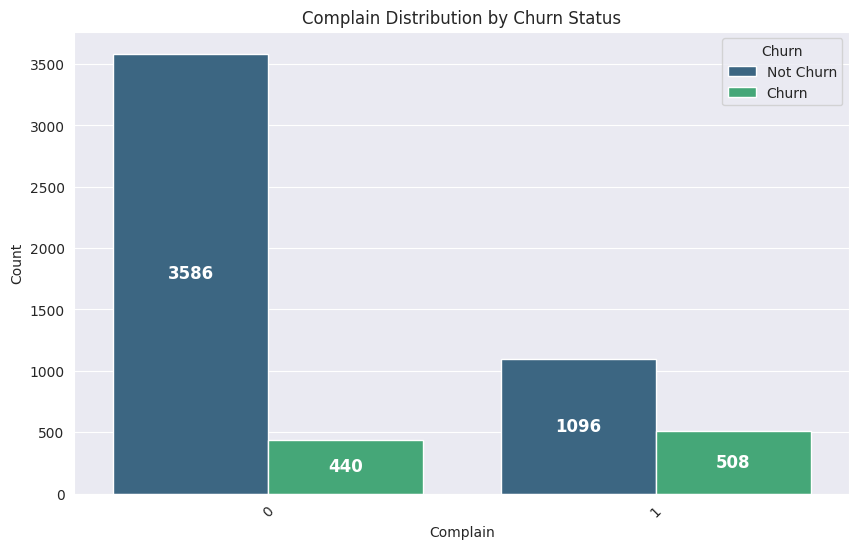

In [ ]:
# Complain Distribution by Churn Status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Complain', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=12)

plt.title('Complain Distribution by Churn Status')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# chi square complain test with churn
complain_churn = pd.crosstab(df['Complain'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(complain_churn)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Complain and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Complain and Churn.")

Chi-Square Statistic: 350.92545525927073
p-value: 2.6644609654641377e-78
Reject H0 → There is a significant relationship between Complain and Churn.


**Insight**: While males dominate the user base in volume, female customers are more likely to churn proportionally. This could reflect differences in product preferences, service expectations, or user experience between genders.

**Business Recommendation**: Consider conducting gender-specific user satisfaction surveys to understand needs and preferences better.

Develop targeted retention strategies—such as personalized communication, offers, or product recommendations—especially for female users to reduce churn risk.

#### Marital Status vs Churn

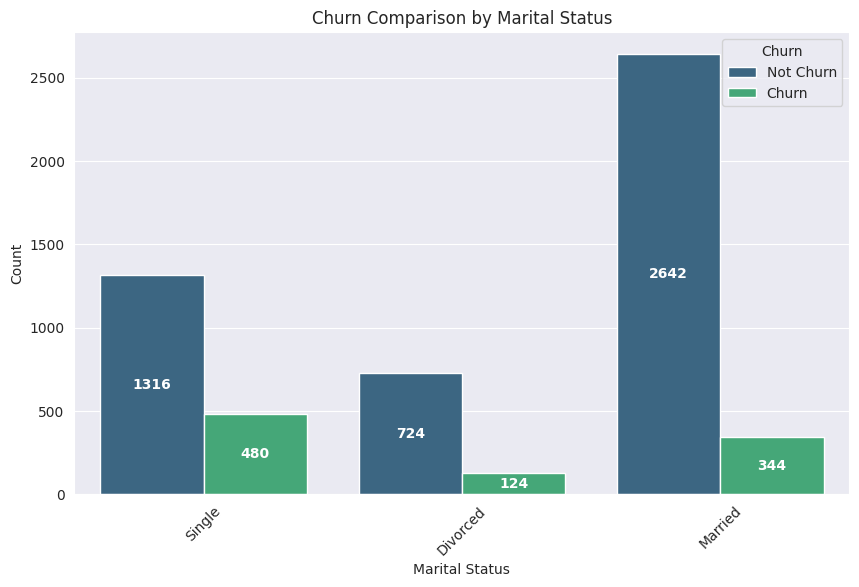

In [ ]:
# relation between marital status and churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MaritalStatus', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.title('Churn Comparison by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# chi square test to see the relationship between marital status and group tenure
marital_tenure = pd.crosstab(df['MaritalStatus'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(marital_tenure)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Marital Status and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Marital Status and Churn.")

Chi-Square Statistic: 188.6710396770566
p-value: 1.073011277910542e-41
Reject H0 → There is a significant relationship between Marital Status and Churn.


**Insight**:

- Single customers have the highest number of churns.

- Married customers have the lowest churn proportion despite being the largest group.

- Divorced customers show moderate churn levels.

This indicates that married individuals are less likely to churn, possibly due to more stable routines or consistent household needs. In contrast, single customers may have more fluctuating needs or weaker platform attachment.

**Business Recommendation**:

- Retention Strategy for Single Users: Create more engaging and flexible offerings tailored for individual lifestyles (e.g., smaller bundle packages, single-person deals).

- Promote Family-Oriented Benefits to leverage the loyalty trend among married users (e.g., family accounts, household discounts).

#### Login Device vs Churn (PreferredLoginDevice vs Churn)

Percentage of Preferred Login Devices by Churn Status:
 Churn                     0      1
PreferredLoginDevice              
Computer              80.17  19.83
Mobile Phone          84.38  15.62


/tmp/ipython-input-116-2248156104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_churn = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().fillna(0)


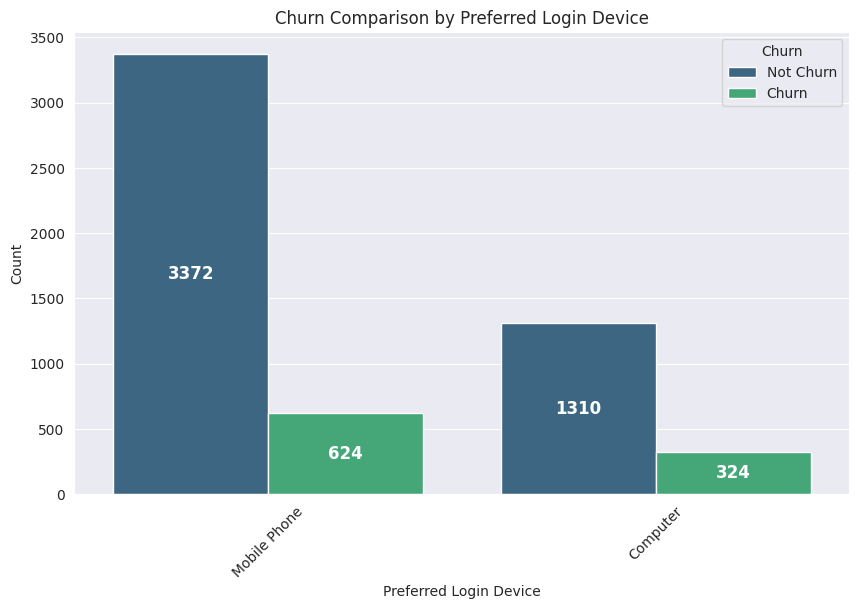

In [ ]:
# Login device distribution based on churn status
device_churn = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().fillna(0)
device_churn_percentage = device_churn.div(device_churn.sum(axis=1), axis=0) * 100
device_churn_percentage = device_churn_percentage.round(2)
print("Percentage of Preferred Login Devices by Churn Status:\n", device_churn_percentage)

# Visualization: Login devices by churn status
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PreferredLoginDevice', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=12)

plt.title('Churn Comparison by Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()


In [ ]:
# Chi-Square test to examine the relationship between login device and churn
product_churn = pd.crosstab(df['PreferredLoginDevice'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(product_churn)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Preferred Login Device and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Preferred Login Device and Churn.")


Chi-Square Statistic: 14.401252650894026
p-value: 0.00014770402399479684
Reject H0 → There is a significant relationship between Preferred Login Device and Churn.


**Insight**: There is a significant relationship between the preferred login device and churn behavior. Customers who prefer to access the platform via mobile phones appear to churn at a different rate than those who log in via computers.

This insight suggests that: Mobile-first users may engage differently with the service—possibly seeking convenience, faster access, or lower involvement.. Computer users may demonstrate more deliberate or engaged behavior, possibly reflecting higher commitment.

**Recommendation**:

- Tailor retention strategies based on device usage. For example, optimize mobile UX and push targeted re-engagement campaigns via app notifications for mobile users.

- Consider building more robust features or loyalty programs into the mobile platform to retain high-risk mobile users.

#### Product Category vs Churn (PreferedOrderCat vs Churn)

Percentage of Product Categories by Churn:
 Churn                   0      1
PreferedOrderCat                
Fashion             84.50  15.50
Grocery             95.12   4.88
Laptop & Accessory  89.76  10.24
Mobile Phone        72.60  27.40
Others              92.42   7.58


/tmp/ipython-input-118-741498549.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_churn = df.groupby(['PreferedOrderCat', 'Churn']).size().unstack().fillna(0)


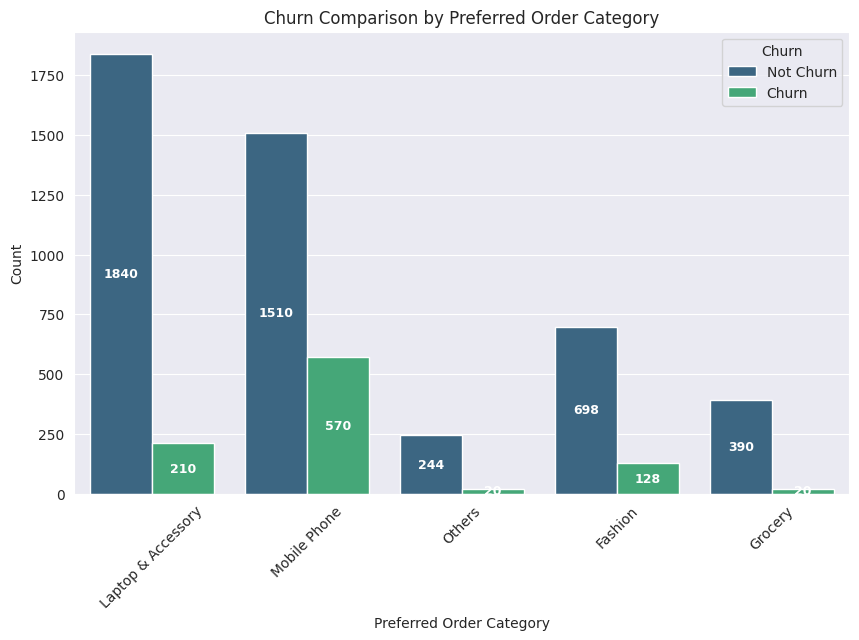

In [ ]:
# Product category distribution by churn
product_category_churn = df.groupby(['PreferedOrderCat', 'Churn']).size().unstack().fillna(0)
product_category_churn_percentage = product_category_churn.div(product_category_churn.sum(axis=1), axis=0) * 100
product_category_churn_percentage = product_category_churn_percentage.round(2)
print("Percentage of Product Categories by Churn:\n", product_category_churn_percentage)

# Visualization of product categories by churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PreferedOrderCat', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Churn Comparison by Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

In [ ]:
# Chi-Square test to examine the relationship between product category and churn

product_churn = pd.crosstab(df['PreferedOrderCat'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(product_churn)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between PreferedOrderCat and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between PreferedOrderCat and Churn.")

Chi-Square Statistic: 288.5977863034404
p-value: 3.119243404287749e-61
Reject H0 → There is a significant relationship between PreferedOrderCat and Churn.


**Insight**: There is a statistically significant relationship between the preferred product category and customer churn. Customers who primarily purchase mobile phones tend to churn more frequently than those who prefer other categories such as groceries or laptops & accessories.

Mobile phone buyers might be more transactional or price-sensitive, leading to less brand or platform loyalty.

Consider designing category-specific retention strategies, such as:

- Loyalty programs for mobile buyers
- Cross-selling essential or recurring items (e.g., accessories, service plans)
- Personalized follow-ups post-purchase to boost engagement and reduce churn.

# Feature Engineering Compilation

# Feature Engineering

From existing columns, we added several engineered features to support the analysis based on Exploratory Data Analysis (EDA) in the previous section, which are:

| Column Name               | Description                                    | Logic |
|---------------------------|------------------------------------------------|-------|
| `Tenure_Group`            | Customer tenure grouping                      | If `Tenure` in months:  <br>0–12 → Onboarding (<1 Th) <br>13–24 → Stabil (1 Th) <br>>=25 → Loyal (2 Th) <br>|
| `OrderHike_Cat`           | Order growth category from previous year      | If `OrderAmountHikeFromlastYear`:  <br>10–13 → Low <br>14–15 → Medium <br>16–18 → High <br>19–26 → Very High |
| `WarehouseToHome_Bin`     | Distance grouping from warehouse to home      | If distance:  <br>0–9 → Very Close <br>10–14 → Close <br>15–20 → Far <br>>20 → Very Far |
| `Cashback_Cat`            | Categorized cashback received                 | If `CashbackAmount`: <br>0–145.77 → Low <br>145.77–163.28 → Medium <br>163.28–196.39 → High <br>>196.39 → Very High |
| `Satisfaction_Category`   | Customer satisfaction classification          | If `SatisfactionScore`: <br>>=4 → satisfied<br><=3 → unsatisfied |
| `Recency`                 | Time since last purchase                      | If `DaySinceLastOrder`: <br>0–7 → High <br>8–14 → Medium <br>>14 → Low |
| `Frequency`               | Order frequency grouping                      | If `OrderCount`: <br>0–5 → Low <br>6–10 → Medium <br>>10 → High |
| `Segment`                 | RFM-based customer segmentation               | Based on `Recency` (R) and `Frequency` (F):<br> At Risk, About to Sleep, Need Attention,<br> New Customer, Champions, Loyal Customers,<br> Hibernating, Promising, Potential Loyalists.
| `NumberAddress` | Number of Address Grouping | If `NumberOfAddress`: <br>0–3 → Few Addresses <br>4–6 → Medium Addresses <br>>7 → Many Addresses |


# RF Analysis

To facilitate our analysis, we found it necessary to perform an RF (Recency and Frequency) analysis. The objective is to segment customers in alignment with the target of implementing specific business recommendations. RF analysis is particularly important for customer retention strategies, especially in the e-commerce sector (Irawan, Putris, & binti Muhammad, 2024).

**Reference:**

Irawan, M. I., Putris, N. A. D., & binti Muhammad, N. (2024). Customer churn prediction using the RFM approach and extreme gradient boosting for company strategy recommendation. Register: Jurnal Ilmiah Teknologi Sistem Informasi, 10(2), 127–140.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   category
 2   Tenure                       5630 non-null   float64 
 3   PreferredLoginDevice         5630 non-null   object  
 4   CityTier                     5630 non-null   category
 5   WarehouseToHome              5630 non-null   float64 
 6   PreferredPaymentMode         5630 non-null   object  
 7   Gender                       5630 non-null   object  
 8   HourSpendOnApp               5630 non-null   float64 
 9   NumberOfDeviceRegistered     5630 non-null   int64   
 10  PreferedOrderCat             5630 non-null   object  
 11  SatisfactionScore            5630 non-null   category
 12  MaritalStatus                5630 non-null   object  
 13  Num

In [ ]:
df['DaySinceLastOrder'].describe()

,DaySinceLastOrder
count,5630.000000
mean,4.459325
std,3.570626
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


## Recency

Recency
High      4328
Medium    1240
Low         62
Name: count, dtype: int64


/tmp/ipython-input-122-2928126311.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Recency', data=df, palette='viridis')


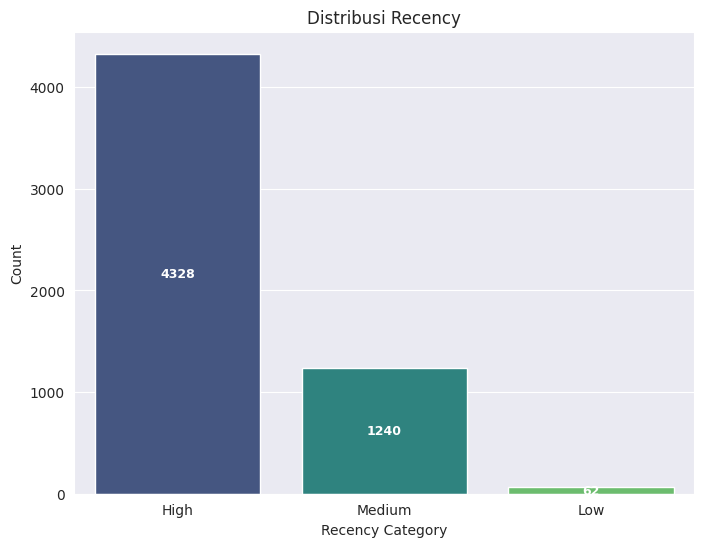

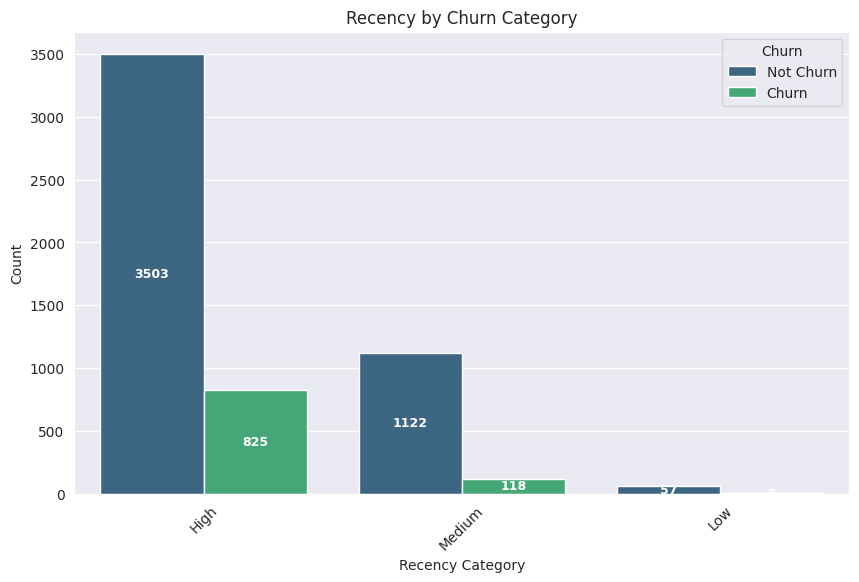

Chi-Square Statistic (Recency Bins vs Churn): 66.16702866573588
p-value (Recency Bins vs Churn): 4.285606413225754e-15
Reject H0 → There is a significant relationship between Recency Bins and Churn.


In [ ]:
# Recency bins
bins = [0, 7, 14, df['DaySinceLastOrder'].max()]
labels = ['High', 'Medium', 'Low']

df['Recency'] = pd.cut(df['DaySinceLastOrder'], bins=bins, labels=labels, include_lowest=True)

# Show the amount of data in each bin
print(df['Recency'].value_counts().sort_index())

# Visualize bins Recency
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Recency', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Distribusi Recency')
plt.xlabel('Recency Category')
plt.ylabel('Count')
plt.show()

# Churn comparison based on Recency Bins
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Recency', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Recency by Churn Category')
plt.xlabel('Recency Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

# Chi-Square test to see the relationship between Recency Bins and Churn
recency_churn = pd.crosstab(df['Recency'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(recency_churn)
print("Chi-Square Statistic (Recency Bins vs Churn):", chi2)
print("p-value (Recency Bins vs Churn):", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Recency Bins and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Recency Bins and Churn.")


In [ ]:
df['Recency'].value_counts()

,count
Recency,
High,4328
Medium,1240
Low,62


## Frequency

In [ ]:
df['OrderCount'].describe()

,OrderCount
count,5630.000000
mean,2.961812
std,2.879248
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


Frequency
Low       4790
Medium     613
High       227
Name: count, dtype: int64


/tmp/ipython-input-125-597287317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Frequency', data=df, palette='viridis')


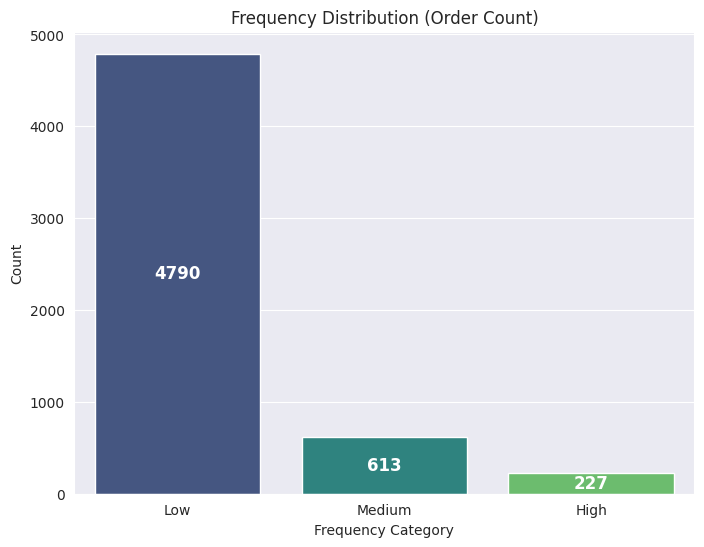

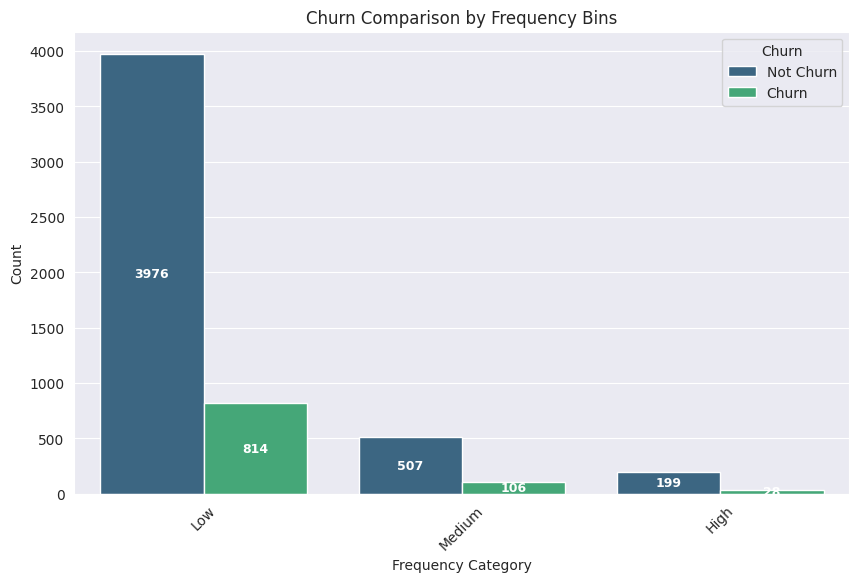

Chi-Square Statistic (Frequency Bins vs Churn): 3.460539966200522
p-value (Frequency Bins vs Churn): 0.17723655263587257
Fail to reject H0 → There is no significant relationship between Frequency Bins and Churn.


In [ ]:
# Frequency Bins by OrderCount
bins = [0, 5, 10, df['OrderCount'].max()] # Define bins based on OrderCount values
labels = ['Low', 'Medium', 'High']

df['Frequency'] = pd.cut(df['OrderCount'], bins=bins, labels=labels, include_lowest=True)

# Show the amount of data in each bin
print(df['Frequency'].value_counts().sort_index())

# Visualize bins Frequency
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Frequency', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=12)

plt.title('Frequency Distribution (Order Count)')
plt.xlabel('Frequency Category')
plt.ylabel('Count')
plt.show()

# Churn Comparison based on Frequency Bins
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Frequency', hue='Churn', data=df, palette='viridis')

# Add percentage labels inside the bars
for p in ax.patches:
    value = p.get_height()
    if value == 0:
      continue
    x = p.get_x() + p.get_width() / 2
    y = value
    label = f'{value:.0f}'
    ax.text(x, y / 2, label, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Churn Comparison by Frequency Bins')
plt.xlabel('Frequency Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.show()

# Chi-Square test to see the relationship between Frequency Bins and Churn
frequency_churn = pd.crosstab(df['Frequency'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(frequency_churn)
print("Chi-Square Statistic (Frequency Bins vs Churn):", chi2)
print("p-value (Frequency Bins vs Churn):", p)
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Frequency Bins and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Frequency Bins and Churn.")


In [ ]:
df['Frequency'].value_counts()

,count
Frequency,
Low,4790
Medium,613
High,227


# **Churn Analysis Summary – Insights and Recommendations**

| No. | Factor                   | Insight                                                                                      | Recommendation                                                                                  |
|-----|--------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| 1   | Tenure                   | New customers are more likely to churn, especially in the first 3–6 months until one year.                 | Focus on onboarding and engagement campaigns during the first months until one year.                          |
| 2   | Order Count              | Customers with fewer orders tend to churn more often.                                       | Re-engage low-order users with reminders, discounts, or loyalty incentives.                    |
| 3   | Order Amount Hike        | Users with stagnant or declining order amounts are at higher risk of churn.                | Track order trends and send personalized offers to boost order value.                          |
| 4   | Warehouse Distance       | Customers farther from warehouses tend to churn more.                                       | Improve delivery experience with better logistics, faster couriers, or incentives like free shipping. |
| 5   | Recency                  | Low recency (not ordering recently) is a strong churn signal.                              | Trigger re-engagement offers or reminders for inactive users.                                  |
| 6   | Cashback Amount          | Cashback levels affect churn behavior; higher cashback may reduce churn.                   | Calibrate cashback schemes by segment to improve retention.                                    |
| 7   | Hour Spent on App        | Time spent on app is not a strong churn predictor.                                          | Focus on satisfaction, complaints, and order behavior instead.                                 |
| 8  | City Tier                | Churn varies across city tiers, likely due to service accessibility.                        | Tailor engagement and offers based on city tiers (urban vs. rural needs). Improving customer campaign in city tier 2                    |
| 9  | Satisfaction Score       | Low satisfaction is strongly linked to churn.                                               | Improve satisfaction via better service, feedback systems, and rewards.                        |
| 10  | Payment Method           | COD and E-Wallet users churn more than credit card users.                                   | Promote stable payment methods (improving COD and E-Wallet systems) and monitor high-churn methods.                                 |
| 11  | Gender                   | Female customers churn more frequently than males.                                          | Design gender-specific communication and offers to retain female users.                        |
| 12  | Marital Status           | Single customers churn more; married customers are more loyal.                              | Tailor flexible offers for singles and family-based benefits for married users.                |
| 13  | Preferred Order Category | Mobile phone buyers churn more than grocery or laptop buyers.                              | Offer category-specific loyalty programs, after-sales support, and cross-selling strategies.   |


## Customer Segment

| Recency | Frequency | Segment             | Churn Risk      |
| ------- | --------- | ------------------- | --------------- |
| High    | High      | Champions           | Low          |
| High    | Medium    | Potential Loyalists | Low - Med |
| High    | Low       | New but Infrequent  | Med          |
| Medium  | High      | Loyal Customers     | Low          |
| Medium  | Medium    | Regular Customers   | Normal          |
| Medium  | Low       | At Risk             | High          |
| Low     | High      | At Risk Loyalist    | High          |
| Low     | Medium    | Lapsing             | Very High   |
| Low     | Low       | Dormant             | Very High   |


In [ ]:
# Segment mapping
def segment_map(r, f):
    if f == 'High' and r == 'Low':
        return 'At Risk'
    elif f == 'High' and r == 'Medium':
        return 'Need Attention'
    elif f == 'High' and r == 'High':
        return 'Champions'
    elif f == 'Medium' and r == 'Low':
        return 'About to Sleep'
    elif f == 'Medium' and r == 'Medium':
        return 'New Customer'
    elif f == 'Medium' and r == 'High':
        return 'Loyal Customers'
    elif f == 'Low' and r == 'Low':
        return 'Hibernating'
    elif f == 'Low' and r == 'Medium':
        return 'Promising'
    elif f == 'Low' and r == 'High':
        return 'Potential Loyalists'
    else:
        return  'Unknown'

df['Segment'] = df.apply(lambda row: segment_map(row['Recency'], row['Frequency']), axis=1)
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Tenure_Group,Frequency,OrderHike_Cat,WarehouseToHome_Bin,RecencyGroup,Recency,NumberAddress,Cashback_Cat,Satisfaction_Category,Segment
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Onboarding (<1 Th),Low,Low,Very Close (≤9),Very Recent,High,Many Addresses (7 =<),Medium,unsatisfied,Potential Loyalists
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,Onboarding (<1 Th),Low,Medium,Very Close (≤9),Very Recent,High,Many Addresses (7 =<),Low,unsatisfied,Potential Loyalists
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,Onboarding (<1 Th),Low,Medium,Very Far (>20),Very Recent,High,Medium Addresses (4-6),Low,unsatisfied,Potential Loyalists
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,Onboarding (<1 Th),Low,Very High,Far (15–20),Very Recent,High,Many Addresses (7 =<),Low,satisfied,Potential Loyalists
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,Onboarding (<1 Th),Low,Low,Close (10–14),Very Recent,High,Few Addresses (<= 3),Low,satisfied,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,Onboarding (<1 Th),Low,High,Very Far (>20),Very Recent,High,Medium Addresses (4-6),Medium,unsatisfied,Potential Loyalists
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,Stable (1 Th),Low,High,Close (10–14),Very Recent,High,Medium Addresses (4-6),Very High,satisfied,Potential Loyalists
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,Onboarding (<1 Th),Low,Very High,Close (10–14),Very Recent,High,Few Addresses (<= 3),High,satisfied,Potential Loyalists
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,Stable (1 Th),Low,Medium,Very Close (≤9),Recent,Medium,Medium Addresses (4-6),High,satisfied,Promising


In [ ]:
df['Segment'].value_counts()

,count
Segment,
Potential Loyalists,3951
Promising,808
New Customer,310
Loyal Customers,301
Need Attention,122
Champions,76
Hibernating,31
At Risk,29
About to Sleep,2


/tmp/ipython-input-129-2710255042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segment', palette='viridis', order=df['Segment'].value_counts().index)


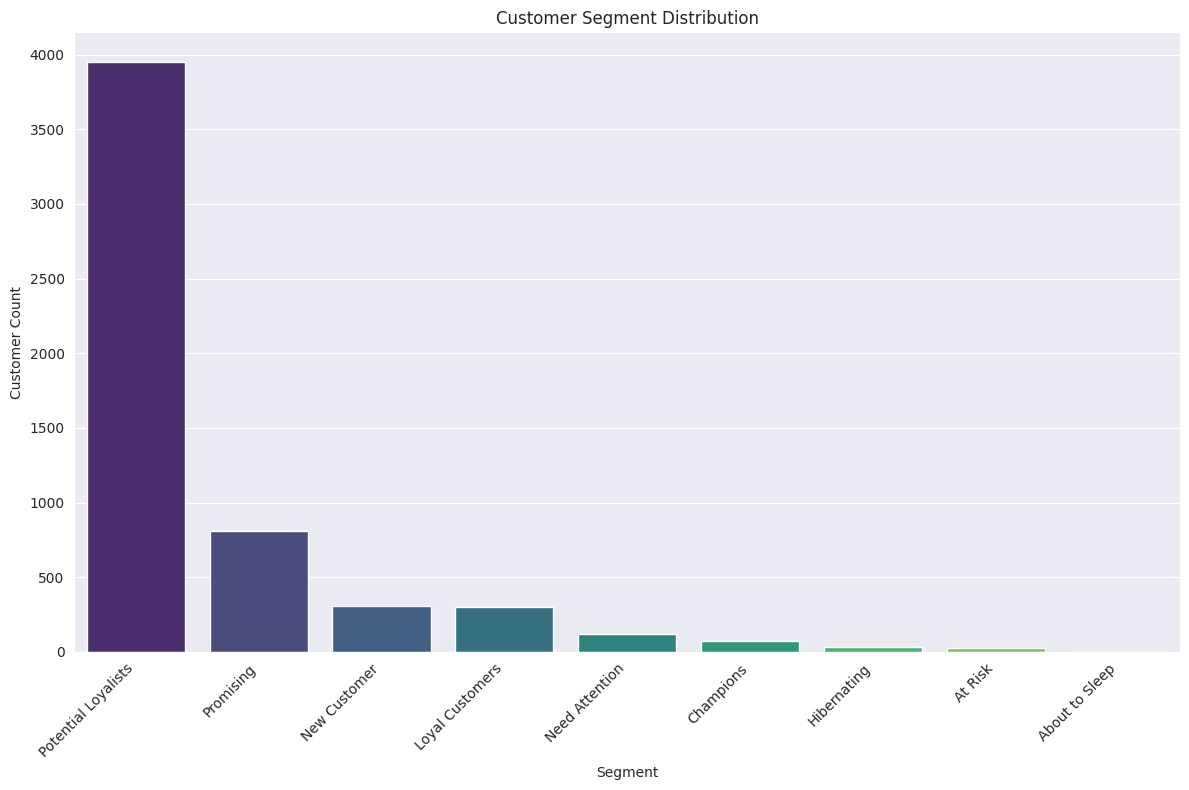

In [ ]:
import matplotlib.pyplot as plt

# Visualize Customer Segmentation
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Segment', palette='viridis', order=df['Segment'].value_counts().index)
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


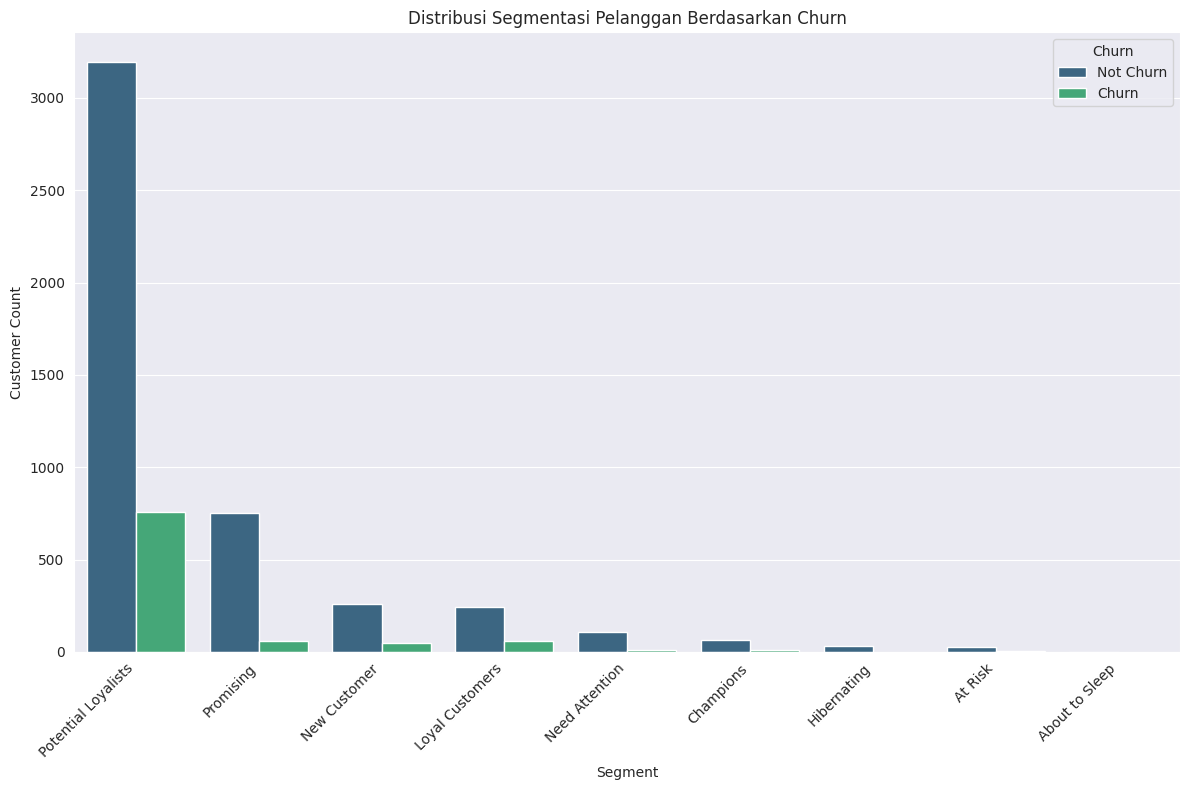

In [ ]:
# Segment vs Churn

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Segment', hue='Churn', palette='viridis', order=df['Segment'].value_counts().index)
plt.title('Distribusi Segmentasi Pelanggan Berdasarkan Churn')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', loc='upper right', labels=['Not Churn', 'Churn'])
plt.tight_layout()
plt.show()

In [ ]:
# Stats analysis between Frequency and Churn

contingency_freq = pd.crosstab(df['Segment'], df['Churn'])

chi2, p, dof, expected = chi2_contingency(contingency_freq)

# Output hasil
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequency Table:\n", expected)

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("Reject H0 → There is a significant relationship between Frequency Group and Churn.")
else:
    print("Fail to reject H0 → There is no significant relationship between Frequency Group and Churn.")


Chi-Square Statistic: 81.65739333500802
p-value: 2.2664698698549308e-14
Degrees of Freedom: 8

Expected Frequency Table:
 [[1.66323268e+00 3.36767318e-01]
 [2.41168739e+01 4.88312611e+00]
 [6.32028419e+01 1.27971581e+01]
 [2.57801066e+01 5.21989343e+00]
 [2.50316519e+02 5.06834813e+01]
 [1.01457194e+02 2.05428064e+01]
 [2.57801066e+02 5.21989343e+01]
 [3.28571616e+03 6.65283837e+02]
 [6.71946004e+02 1.36053996e+02]]
Reject H0 → There is a significant relationship between Frequency Group and Churn.


### Saving Binned and Added Variable of DataFrame to CSV

In [ ]:
# save to csv
df.to_csv('df_bin.csv', index=False)

In [ ]:
from google.colab import files

files.download('df_bin.csv')

# Remove hashtags to save df_bin files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In this section, the following new variables were added:

1. Tenure_Group (Onboarding, Stable, Loyal)
2. Satisfaction_Category (Satisfied, Unsatisfied)
3. Recency (High, Medium, Low)
4. Frequency (High, Medium, Low)
5. Segment: Customer segmentation based on RFM scores, with labels like Champions, Loyal Customers, At Risk, Hibernating, etc., allowing for precise targeting and retention strategies.
6. OrderHike_Cat: Categorizes the increase in order amount from last year into four groups (Low, Medium, High, Very High), based on quartiles. Useful to assess how spending growth relates to churn behavior.
7. WarehouseToHome_Bin: Groups the delivery distance into four bins (Very Close, Close, Far, Very Far). This helps analyze whether longer delivery distances influence customer churn.
8. RecencyGroup: Classifies how recently the customer made a purchase (e.g., Very Recent, Recent, Moderate, Inactive), based on days since last order. Helps identify engagement levels.
9. Cashback_Cat: Categorizes total cashback received (Low, Medium, High), based on quartiles, indicating how reward-based incentives relate to loyalty.
